# Assignment 1 - Github Repository 

I will create this notebook using a dataset that was collected as part of an MSc Psychology (Conversion) dissertation project at the University of Glasgow titled "Rooted: Exploring Connections Between Well-Being, Nature Relatedness and Pro-environmental Behaviour."
The link to where I found this dataset is here: https://osf.io/ebgv4/overview 
And according to that link, I can use this dataset under this license - CC-By Attribution 4.0 International. 

This notebook should be found in this Github repository: https://github.com/abeecarpenter/everything-counts-assignment-1/tree/main

This dataset collected some demographic information about 227 participants including details such as their gender, job, and age. And then they asked participants to fill out three types of questionnaires - 

* **WHO-5 Wellbeing Index** - which is used as an indicator of a current wellbeing score for each of the participants.
* **Pro-environmental Behaviour (PEB) Scale** - which is used as an indicator of how often the participant has engaged in activities to improve the quality of their local area. 
* **Nature Relatedness (NR) Scale** - which is used to assess how engaged/ involved with nature the participant feels.

So, firstly I need to pull in the dataset, import some useful packages - and check to see what the dataset looks like.

In [1]:
# importing useful packages that will be used later

import warnings
warnings.filterwarnings("ignore")
import io
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# reading in the csv file, and calling it 'nc' for nature connectedness. 

df_url = 'https://raw.githubusercontent.com/abeecarpenter/everything-counts-assignment-1/refs/heads/main/Rooted_Data_FINAL.csv'
url_content = requests.get(df_url, verify = False).content
nc = pd.read_csv(io.StringIO(url_content.decode('utf-8')))
nc.head()

,StartDate,EndDate,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,Demographic_Q1,Demographic_Q2,Demographic_Q3,...,NR_Q12,NR_Q13,NR_Q14,NR_Q15,NR_Q16,NR_Q17,NR_Q18,NR_Q19,NR_Q20,NR_Q21
0,29/11/2023 14:13,29/11/2023 14:17,100,265,True,29/11/2023 14:17,R_eKIqjsE5UHwrwMp,26,Woman,Small city or town,...,Agree a little,Disagree strongly,Disagree a little,Disagree strongly,Agree strongly,Agree a little,Disagree strongly,Disagree a little,Agree a little,Agree a little
1,29/11/2023 14:17,29/11/2023 14:22,100,320,True,29/11/2023 14:22,R_2rnZIMb7DWKS2hn,37,Woman,Small city or town,...,Agree a little,Agree a little,Disagree a little,Disagree strongly,Agree a little,Disagree a little,Disagree strongly,Agree strongly,Agree strongly,Neither agree nor disagree
2,29/11/2023 15:35,29/11/2023 15:41,100,316,True,29/11/2023 15:41,R_1q9DWDyZClQFJOQ,25,Man,Rural area,...,Agree a little,Agree a little,Disagree a little,Disagree strongly,Agree a little,Neither agree nor disagree,Disagree strongly,Agree a little,Disagree a little,Agree a little
3,30/11/2023 11:34,30/11/2023 11:39,100,278,True,30/11/2023 11:39,R_1E6wOim6D32s8Yt,18,Woman,Rural area,...,Agree a little,Disagree strongly,Neither agree nor disagree,Disagree a little,NaN,Agree a little,Disagree a little,Agree a little,Disagree a little,Neither agree nor disagree
4,30/11/2023 18:24,30/11/2023 18:30,100,371,True,30/11/2023 18:30,R_3gZAphjUelEDoNf,21,Woman,Large city,...,Agree a little,Neither agree nor disagree,Disagree a little,Agree a little,Agree a little,Agree a little,Disagree strongly,Agree a little,Disagree a little,Agree a little


## 1. Understanding the shape of the data

I should first understand the shape and quality of the data to understand if it needs any tidying up before it can be analysed. 
* look at the shape of the dataset
* look at the names of the dataset
* look at the content of the data - e.g., any null values. 

In [2]:
nc.shape

(227, 52)

In [3]:
nc.columns

Index(['StartDate', 'EndDate', 'Progress', 'Duration (in seconds)', 'Finished',
       'RecordedDate', 'ResponseId', 'Demographic_Q1', 'Demographic_Q2',
       'Demographic_Q3', 'Demographic_Q4', 'Demographic_Q5', 'Demographic_Q6',
       'WHO_Q1', 'WHO_Q2', 'WHO_Q3', 'WHO_Q4', 'WHO_Q5', 'PEB_Q1', 'PEB_Q2',
       'PEB_Q3', 'PEB_Q4', 'PEB_Q5', 'PEB_Q6', 'PEB_Q7', 'PEB_Q8', 'PEB_Q9',
       'PEB_Q10', 'PEB_Q11', 'PEB_Q12', 'PEB_Q13', 'NR_Q1', 'NR_Q2', 'NR_Q3',
       'NR_Q4', 'NR_Q5', 'NR_Q6', 'NR_Q7', 'NR_Q8', 'NR_Q9', 'NR_Q10',
       'NR_Q11', 'NR_Q12', 'NR_Q13', 'NR_Q14', 'NR_Q15', 'NR_Q16', 'NR_Q17',
       'NR_Q18', 'NR_Q19', 'NR_Q20', 'NR_Q21'],
      dtype='object')

In [4]:
nc['NR_Q16'].info()
# there are some null values - so there are likely more in other rows, I should remove those 

<class 'pandas.core.series.Series'>
RangeIndex: 227 entries, 0 to 226
Series name: NR_Q16
Non-Null Count  Dtype 
--------------  ----- 
225 non-null    object
dtypes: object(1)
memory usage: 1.9+ KB


By looking at this we can see that there is: 

* a column for each reply of the questionaire - we need to score these, so that they're easier to compare.
* demographic columns aren't labelled very well, so I will make a note here, so as not to forget them:
    * 'Demographic_Q1' - Age
    * 'Demographic_Q2' - Gender
    * 'Demographic_Q3' - Community
    * 'Demographic_Q4' - Job-Related statistics
    * 'Demographic_Q5' - Political Orientation
    * 'Demographic_Q6' - How much time do you spend outside?

## 2. Cleaning the Data 

This dataset requires some cleaning up for it to be useful for the analysis. 
There are a few tasks to complete - 

* Firstly, I need to convert the questionnaire replies to scores to be able to compare them. Each of the questionnaires have different, but similarly scored scales. And an important thing to note is that the Nature Relatedness Scale questionnaire has questions that are scored in reverse. (Reverse scored items: 2, 3, 10, 11, 13, 14, 15, 18).

* Secondly, I need to deal with rows that have null values, otherwise this will mess up some of the scoring. I decided to keep rows that were marked as unfinished, as long as there are no null values. 

* Finally, I need to cut the dataframe down to the columns I am actually interested in just to tidy up my workspace a little. 

### 2.1. Converting the scales to scores. 

So I need to use a mapping to convert each of the questionnaire answers to a score and create a new column for each questionnaires' total - e.g., 'WHO5_total', 'PEB_total', and 'NR_total'. 

With the NR_total one, i need to remember that there are reverse-scored questionnaire answers - so that will be more complex to implement. 

In [5]:
# making a mapping for the questionnaire scores
mapping_who = {
    'All the time': 5,
    'Most of the time': 4,
    'More than half of the time': 3,
    'Less than half of the time': 2,
    'Some of the time': 1,
    'At no time': 0
}


In [6]:
# creating a list of the column names for the questions
who_cols = [f'WHO_Q{i}' for i in range(1, 6)]

who_cols

['WHO_Q1', 'WHO_Q2', 'WHO_Q3', 'WHO_Q4', 'WHO_Q5']

In [7]:
# we take the smaller dataframe of nc[who_cols] - which is just the questionnaire string values 

nc[who_cols]

,WHO_Q1,WHO_Q2,WHO_Q3,WHO_Q4,WHO_Q5
0,Most of the time,More than half of the time,Less than half of the time,Some of the time,Most of the time
1,More than half of the time,More than half of the time,More than half of the time,More than half of the time,More than half of the time
2,More than half of the time,More than half of the time,Most of the time,More than half of the time,More than half of the time
3,Some of the time,Less than half of the time,Some of the time,At no time,More than half of the time
4,Some of the time,Some of the time,Less than half of the time,More than half of the time,Some of the time
...,...,...,...,...,...
222,Some of the time,Less than half of the time,More than half of the time,More than half of the time,Some of the time
223,Most of the time,Most of the time,Less than half of the time,More than half of the time,Most of the time
224,Less than half of the time,More than half of the time,Less than half of the time,Some of the time,Some of the time
225,Less than half of the time,Some of the time,Some of the time,At no time,Less than half of the time


In [8]:
# adding on a new column to the dataframe - where the values are converted to the values and summed across the rows to give us a total
nc['WHO5_total'] = nc[who_cols].apply(lambda col: col.map(mapping_who)).sum(axis=1)

nc['WHO5_total']

0      14.0
1      15.0
2      16.0
3       7.0
4       8.0
       ... 
222    10.0
223    17.0
224     9.0
225     6.0
226    17.0
Name: WHO5_total, Length: 227, dtype: float64

In [9]:
# to check if the WHO5_total was added on to the dataframe

nc.head()

,StartDate,EndDate,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,Demographic_Q1,Demographic_Q2,Demographic_Q3,...,NR_Q13,NR_Q14,NR_Q15,NR_Q16,NR_Q17,NR_Q18,NR_Q19,NR_Q20,NR_Q21,WHO5_total
0,29/11/2023 14:13,29/11/2023 14:17,100,265,True,29/11/2023 14:17,R_eKIqjsE5UHwrwMp,26,Woman,Small city or town,...,Disagree strongly,Disagree a little,Disagree strongly,Agree strongly,Agree a little,Disagree strongly,Disagree a little,Agree a little,Agree a little,14.0
1,29/11/2023 14:17,29/11/2023 14:22,100,320,True,29/11/2023 14:22,R_2rnZIMb7DWKS2hn,37,Woman,Small city or town,...,Agree a little,Disagree a little,Disagree strongly,Agree a little,Disagree a little,Disagree strongly,Agree strongly,Agree strongly,Neither agree nor disagree,15.0
2,29/11/2023 15:35,29/11/2023 15:41,100,316,True,29/11/2023 15:41,R_1q9DWDyZClQFJOQ,25,Man,Rural area,...,Agree a little,Disagree a little,Disagree strongly,Agree a little,Neither agree nor disagree,Disagree strongly,Agree a little,Disagree a little,Agree a little,16.0
3,30/11/2023 11:34,30/11/2023 11:39,100,278,True,30/11/2023 11:39,R_1E6wOim6D32s8Yt,18,Woman,Rural area,...,Disagree strongly,Neither agree nor disagree,Disagree a little,NaN,Agree a little,Disagree a little,Agree a little,Disagree a little,Neither agree nor disagree,7.0
4,30/11/2023 18:24,30/11/2023 18:30,100,371,True,30/11/2023 18:30,R_3gZAphjUelEDoNf,21,Woman,Large city,...,Neither agree nor disagree,Disagree a little,Agree a little,Agree a little,Agree a little,Disagree strongly,Agree a little,Disagree a little,Agree a little,8.0


In [10]:
# we can copy that the same way again to do the peb value (even though we won't end up using this) 

mapping_peb = {
    'Very often': 5,
    'Often': 4,
    'Sometimes': 3,
    'Rarely': 2,
    'Never': 1
}

peb_cols = [f'PEB_Q{i}' for i in range(1, 14)]

nc['PEB_total'] = nc[peb_cols].apply(lambda col: col.map(mapping_peb)).sum(axis=1)

In [11]:
#this one needs to be slightly different because there are some reverse scoring questions. 

mapping_nr = {
    'Agree strongly': 5,
    'Agree a little': 4,
    'Neither agree nor disagree': 3,
    'Disagree a little': 2,
    'Disagree strongly': 1
}

#there are some items that are scored reversely 
reverse_items = [2, 3, 10, 11, 13, 14, 15, 18]

#this creates the column headers in the same way 
nr_cols = [f'NR_Q{i}' for i in range(1, 22)]


#this is a function to decide whether a score needs to be reversed or not - and we can use it below
def score_nr_item(col, idx):
    scored = col.map(mapping_nr)
    if idx in reverse_items:
        scored = 6 - scored
    return scored

# this creates the new column for just the nr total scores. 
nc['NR_total'] = sum(
    score_nr_item(nc[f'NR_Q{i}'], i)
    for i in range(1, 22)
)

In [12]:
# to check if those new columns have been applied - yay!

nc.columns

Index(['StartDate', 'EndDate', 'Progress', 'Duration (in seconds)', 'Finished',
       'RecordedDate', 'ResponseId', 'Demographic_Q1', 'Demographic_Q2',
       'Demographic_Q3', 'Demographic_Q4', 'Demographic_Q5', 'Demographic_Q6',
       'WHO_Q1', 'WHO_Q2', 'WHO_Q3', 'WHO_Q4', 'WHO_Q5', 'PEB_Q1', 'PEB_Q2',
       'PEB_Q3', 'PEB_Q4', 'PEB_Q5', 'PEB_Q6', 'PEB_Q7', 'PEB_Q8', 'PEB_Q9',
       'PEB_Q10', 'PEB_Q11', 'PEB_Q12', 'PEB_Q13', 'NR_Q1', 'NR_Q2', 'NR_Q3',
       'NR_Q4', 'NR_Q5', 'NR_Q6', 'NR_Q7', 'NR_Q8', 'NR_Q9', 'NR_Q10',
       'NR_Q11', 'NR_Q12', 'NR_Q13', 'NR_Q14', 'NR_Q15', 'NR_Q16', 'NR_Q17',
       'NR_Q18', 'NR_Q19', 'NR_Q20', 'NR_Q21', 'WHO5_total', 'PEB_total',
       'NR_total'],
      dtype='object')

### 2.2. Removing the null values.

We saw earlier that there were some null values in the questionnaire replies, we should remove these so they do not mess with the total values. 
We can use `nc.dropna()` to remove these values. 

In [13]:
nc = nc.dropna()

In [14]:
nc.shape

(186, 55)

So now, we have a removed any rows with null values and we have gone from 227 rows to 186 rows.

### 2.3. Reducing the number of columns.

I would like to reduce the columns to things I am interested in conducting analysis with. 
This is likely just going to be: 
* The Demographic information
* The 3 total columns that were calculated and added. 

Because for this analysis - I am not interested in the survey details - e.g., dates and times, etc... 

This will be called ncs - nature connectedness simple

In [15]:
ncs = nc[['Demographic_Q1', 'Demographic_Q2', 'Demographic_Q3', 'Demographic_Q4', 'Demographic_Q5', 'Demographic_Q6', 'WHO5_total', 'NR_total', 'PEB_total']]

In [16]:
ncs.head()

,Demographic_Q1,Demographic_Q2,Demographic_Q3,Demographic_Q4,Demographic_Q5,Demographic_Q6,WHO5_total,NR_total,PEB_total
0,26,Woman,Small city or town,Employed,2.0,Over 6 hours,14.0,87.0,24.0
1,37,Woman,Small city or town,Employed,3.0,2 hours,15.0,79.0,15.0
2,25,Man,Rural area,Student,2.0,Over 6 hours,16.0,83.0,12.0
5,18,Woman,Large city,Student,3.0,Over 6 hours,16.0,90.0,26.0
6,18,Woman,Large city,Student,3.0,Over 6 hours,13.0,69.0,14.0


In [17]:
ncs.shape

#so, now it is only 9 columns - much easier to handle - and only the info we care about. 

(186, 9)

## 3. Analysis! 🧠

So, now we have the dataset ready to complete some analysis. 

### 3.1. Data Types
Also, reviewing the data types in the dataset might be useful in aiding in analysis. 

- Age - Discrete
- Gender - Categorical
- Community - Categorical
- Job - Categorical
- Political Orientation - Categorical
- Time Outside - Ordinal

I was slightly unsure about these - since they are summed totals of ordinal data, however, they will be treated like continuous data when being analysed - to be able to look at things like mean values etc... 

- WHO_total - Continuous
- PEB_total - Continuous
- NR_total - Continuous

### 3.2. Assessing connection between NR_total and other data
What variables could possibly impact the NR_total variable (Nature Relatedness Scale)?

- Time Outside vs NR
- WHO vs NR
- Gender vs NR
- Job vs NR
- Location vs NR

In [18]:
# setting up some charts configuration 
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 12

Lets look at the structure of the NR_total column to start with. 

Description of NR_total:
 count    186.000000
mean      83.639785
std       12.557945
min       38.000000
25%       76.000000
50%       84.000000
75%       94.000000
max      105.000000
Name: NR_total, dtype: float64 

Interquartile range of NR_total:
 18.0


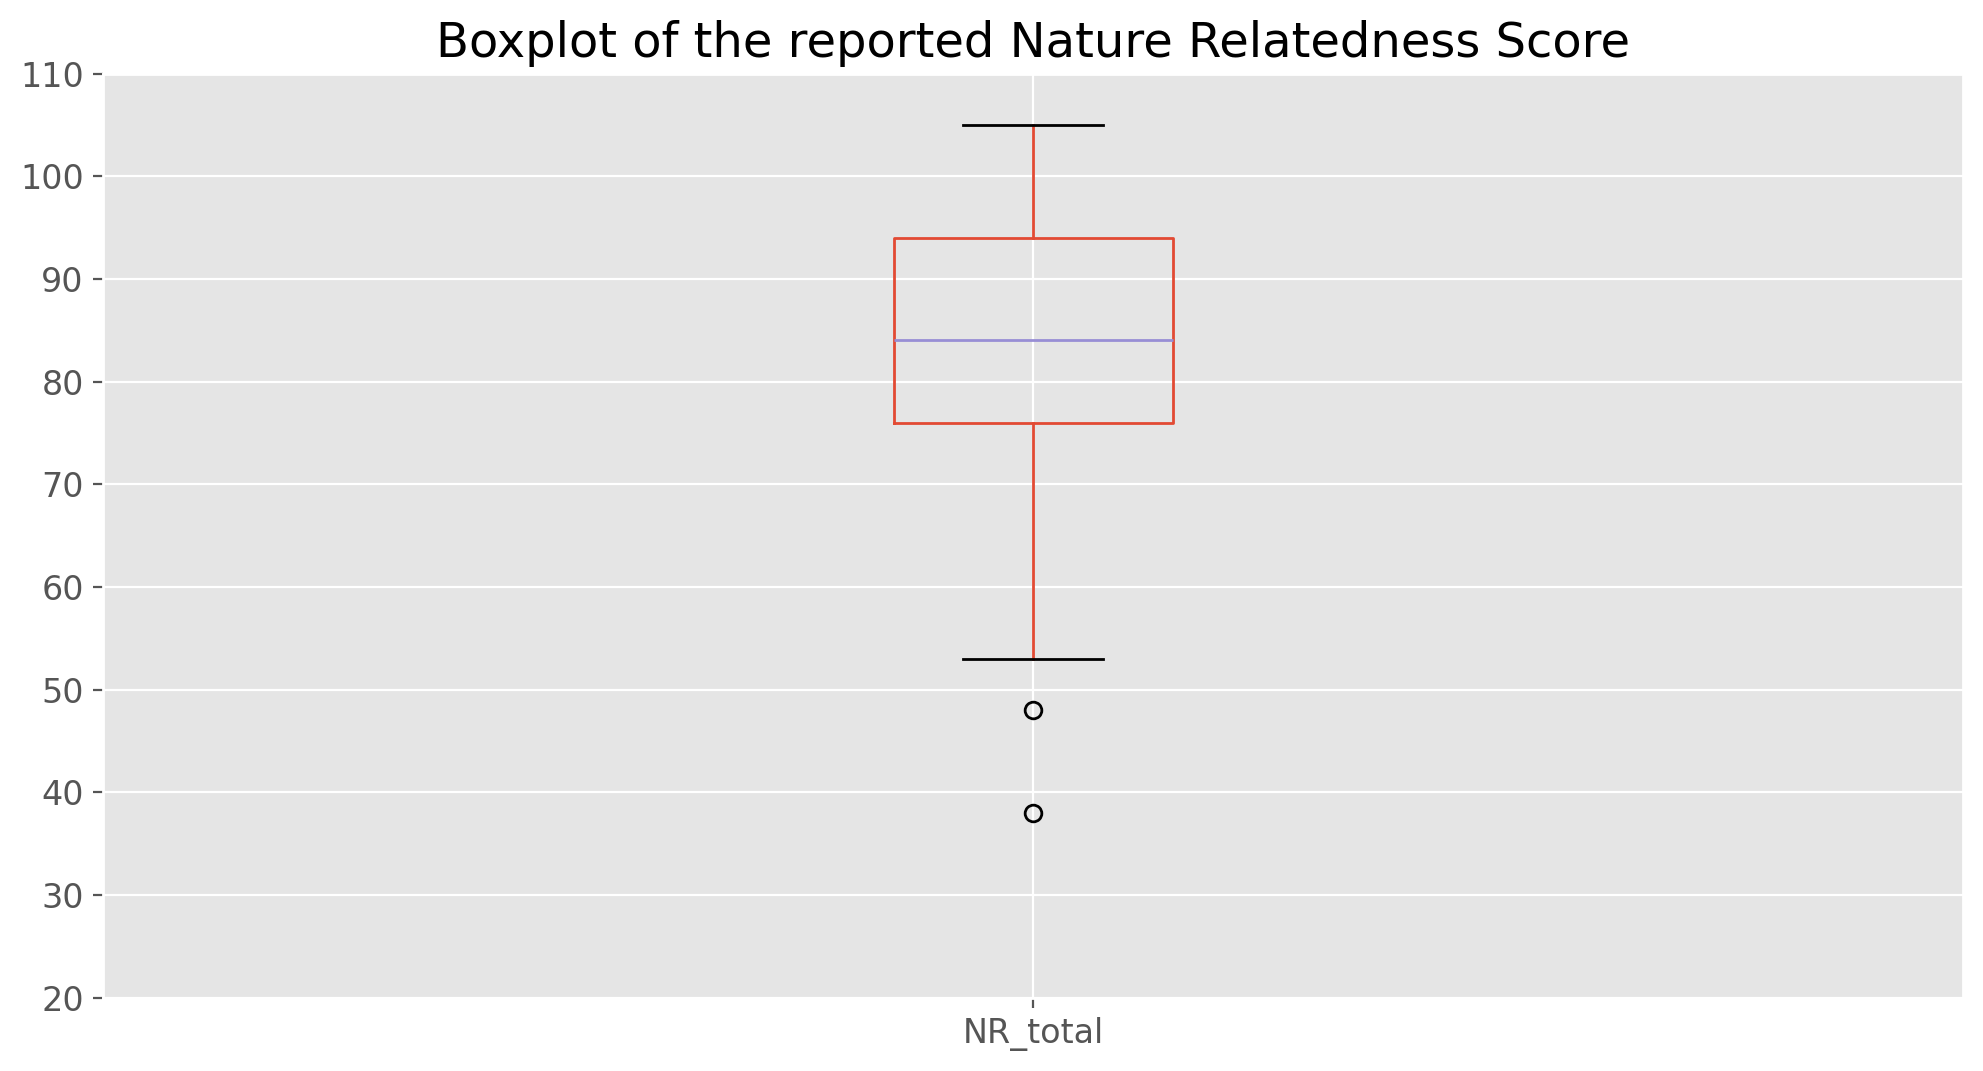

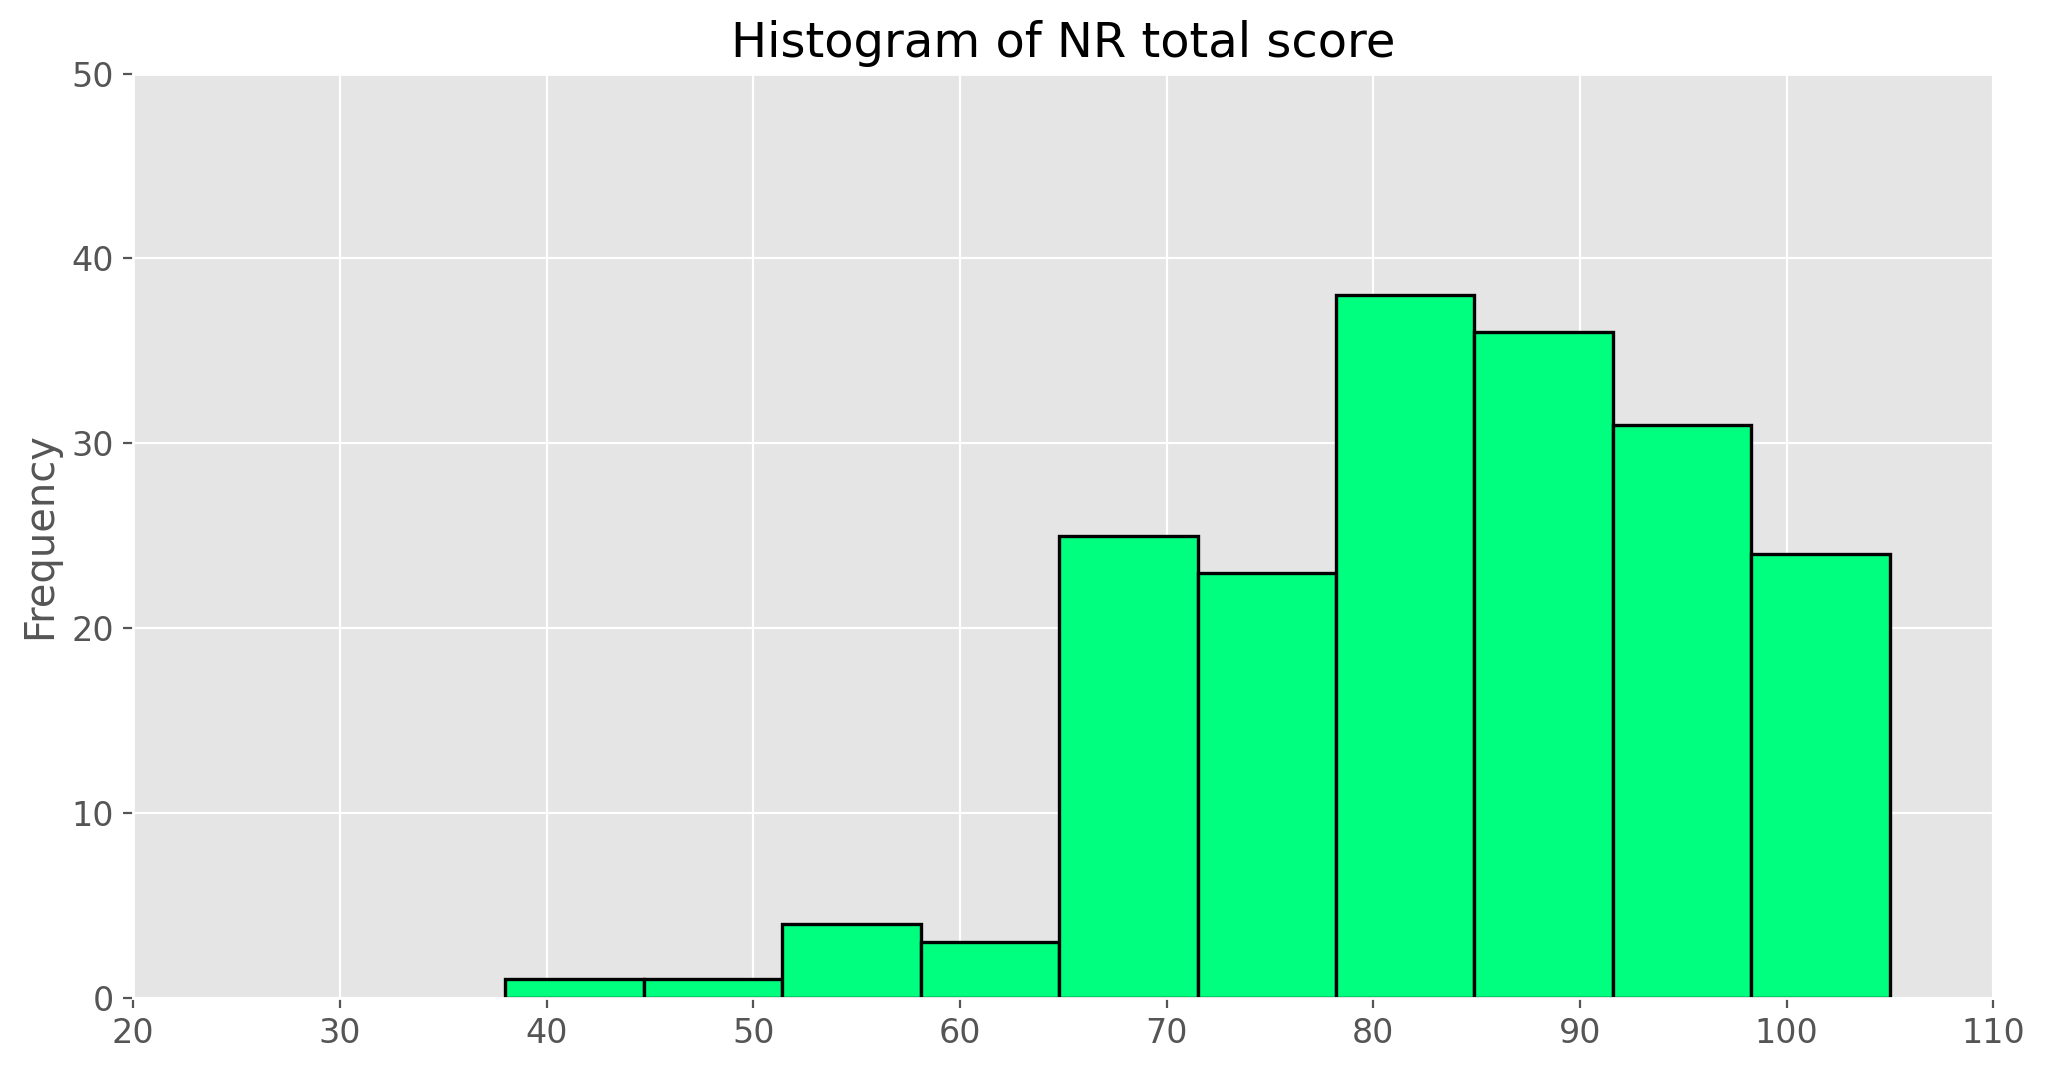

In [19]:
print('Description of NR_total:\n', ncs['NR_total'].describe(), '\n')
print('Interquartile range of NR_total:\n', ncs['NR_total'].quantile(0.75)-ncs['NR_total'].quantile(0.25))

plt.ylim(20, 110)
ncs.boxplot(column = 'NR_total')
plt.title('Boxplot of the reported Nature Relatedness Score')
plt.suptitle('')
plt.show();

plt.ylim(0, 50)
plt.xlim(20, 110)
ncs['NR_total'].plot(kind = 'hist', color = 'springgreen', edgecolor = 'black', 
                linewidth = 1.2, title = 'Histogram of NR total score')
plt.show(); 

From the three different visualisations, we can get the following information about the scores across the range of 21 - 105
* the description shows the mean, standard deviation, upper and lower quartiles, etc... 
    * we can use this info to calculate the interquartile range (IQR) as well - which was done by 
    * so, for the Nature Relatedness scores, it is showing that there is a **bias towards the higher end of the scale**
* the box plot shows us that there are a **couple of outliers on the lower end**, but this indicates that it is unusual to be rating yourself that low in terms of nature relatedness.
* and finally, the histogram **shows the distribution of scores slightly more clearly, and it shows that there is a skewed distribution toward the higher scoring end** of the nature relatedness score. 

### 3.3. Brief look at the WHO5 Wellbeing score. 

And I thought it could be interesting to very briefly look at the spread of the WHO5 data, just to see people's self-reported wellbeing scores. 

description of WHO5_total:
 count    186.000000
mean      13.360215
std        4.562400
min        1.000000
25%       10.250000
50%       13.000000
75%       16.000000
max       24.000000
Name: WHO5_total, dtype: float64


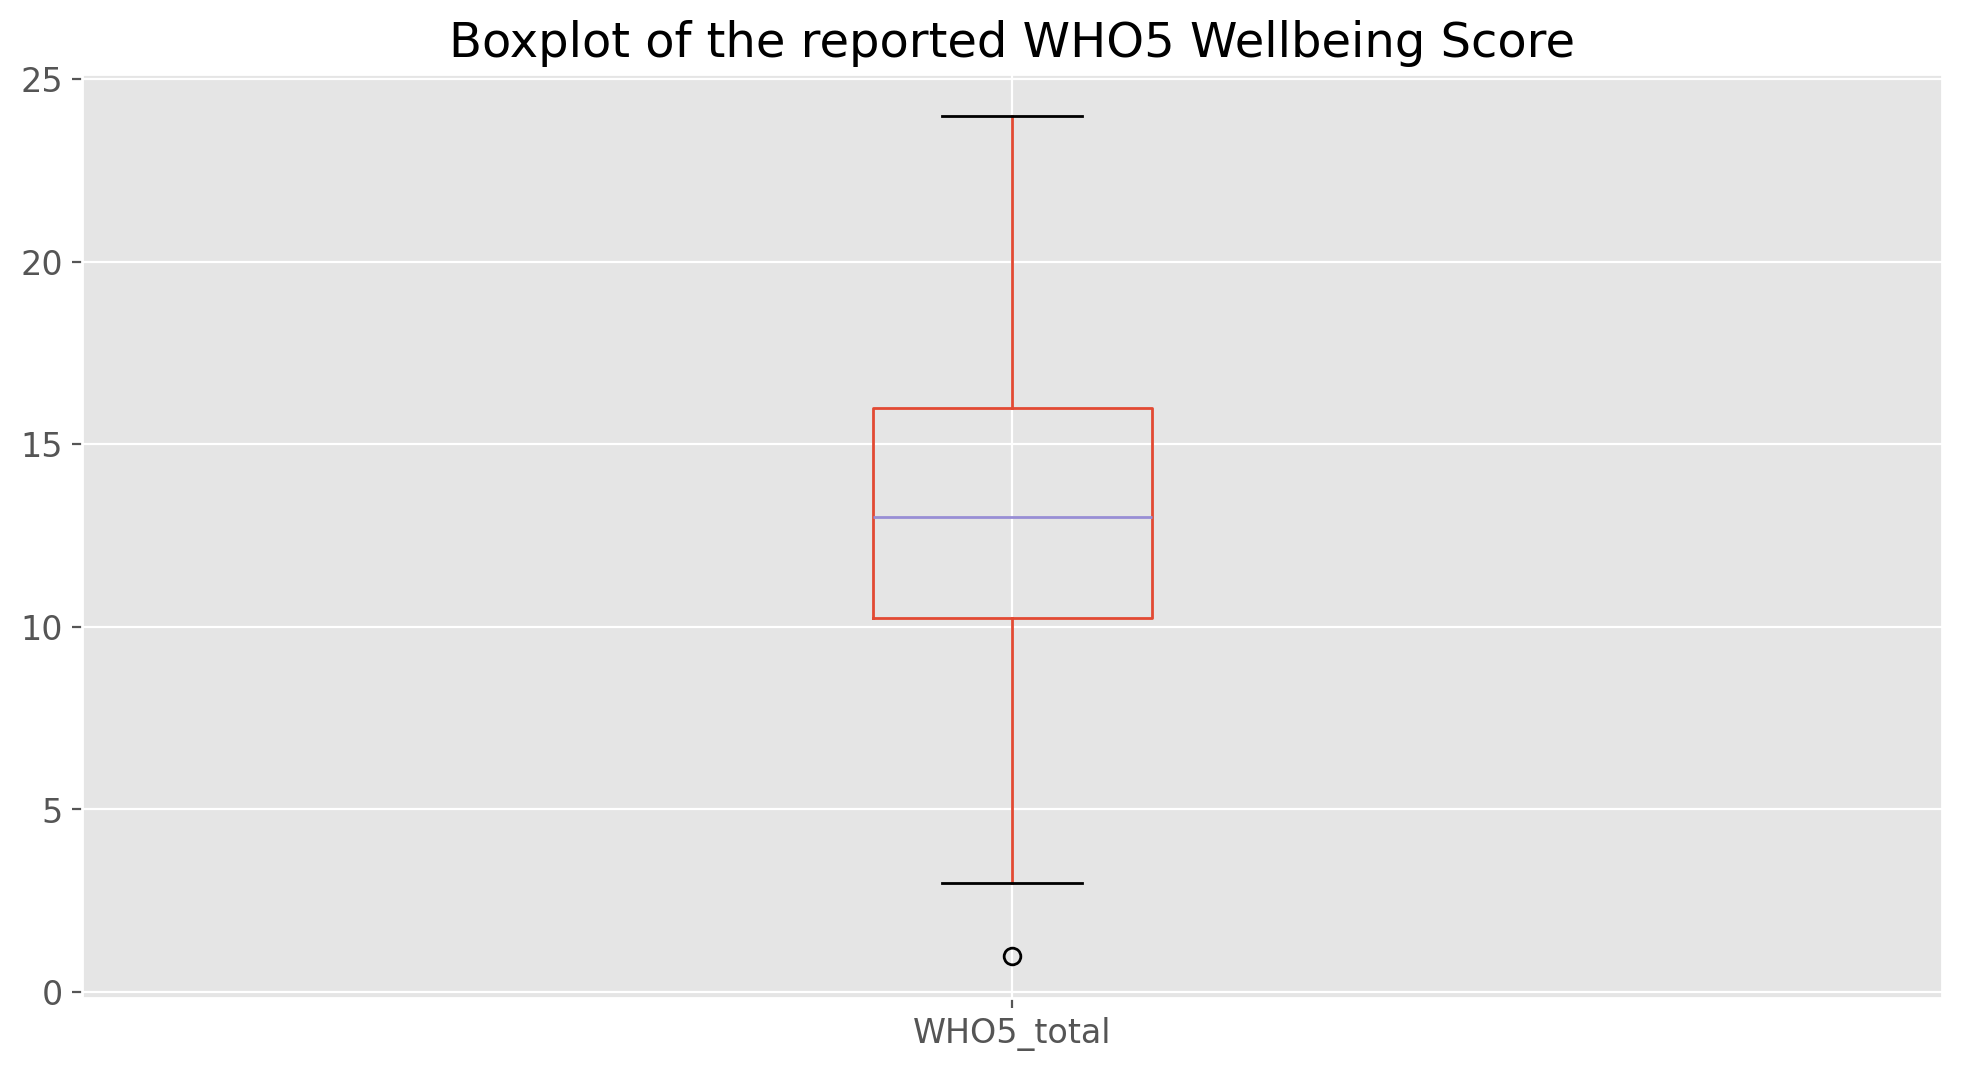

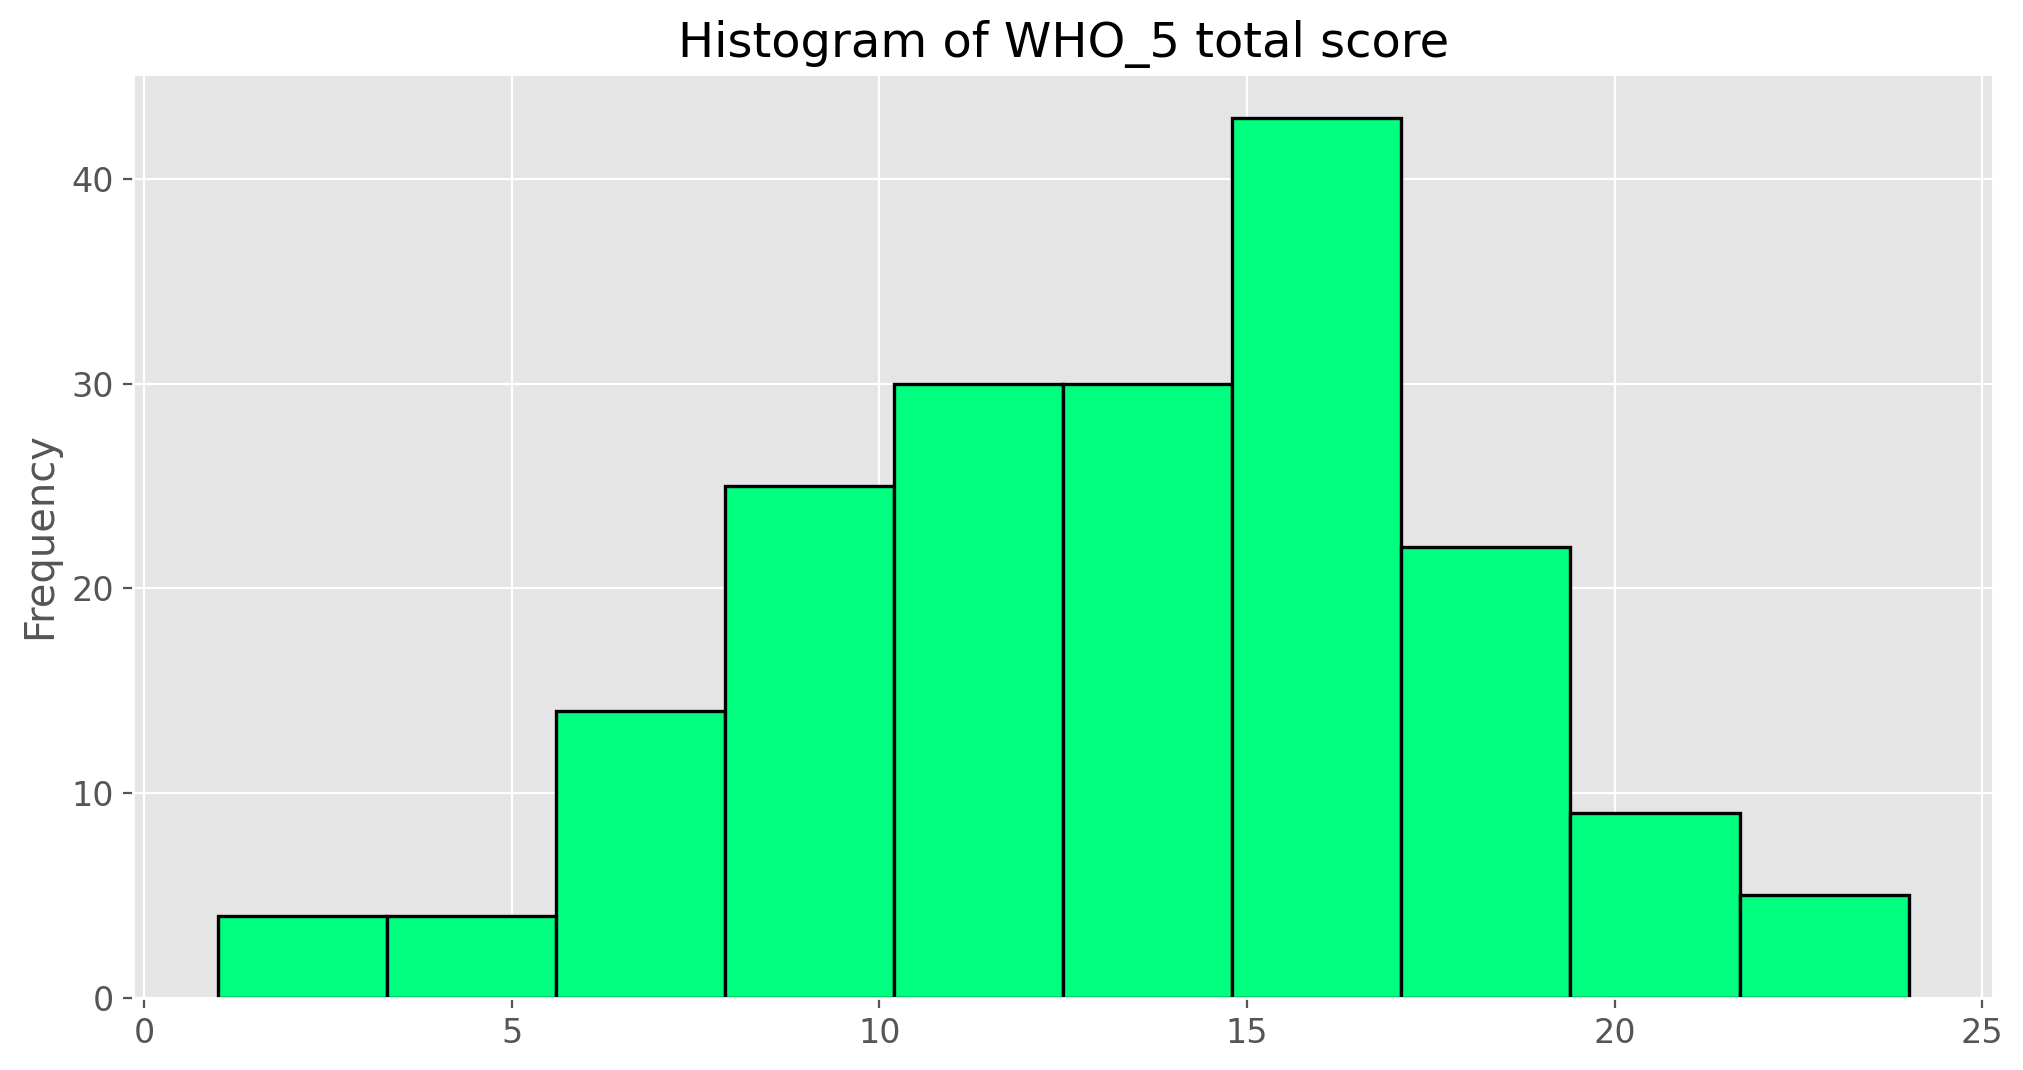

In [20]:
print('description of WHO5_total:\n', ncs['WHO5_total'].describe())

ncs.boxplot(column = 'WHO5_total')
plt.title('Boxplot of the reported WHO5 Wellbeing Score')
plt.suptitle('')
plt.show();

ncs['WHO5_total'].plot(kind = 'hist', color = 'springgreen', edgecolor = 'black', 
                linewidth = 1.2, title = 'Histogram of WHO_5 total score')
plt.show(); 


These charts and description seem to show that there is quite a wide spread of reported scores across the whole range of 0-25.
However even though there is a large spread, there is still an outlier at the lower end, and the larger majority at the higher end of the scores. 
The histogram also shows an almost normal but slightly skewed distribution toward the higher scores. 

### 3.4. A quick look at the demographic data 

#### 3.4.1 Firstly, the reported locations column. 

This shows that there was quite a spread of different locations - with the most being in a large city (possibly unsurprising as since this was a questionnaire carried out at the University of Glasgow). 


Demographic_Q3
Large city                  65
Small city or town          53
Rural area                  34
Suburb near a large city    34
Name: count, dtype: int64


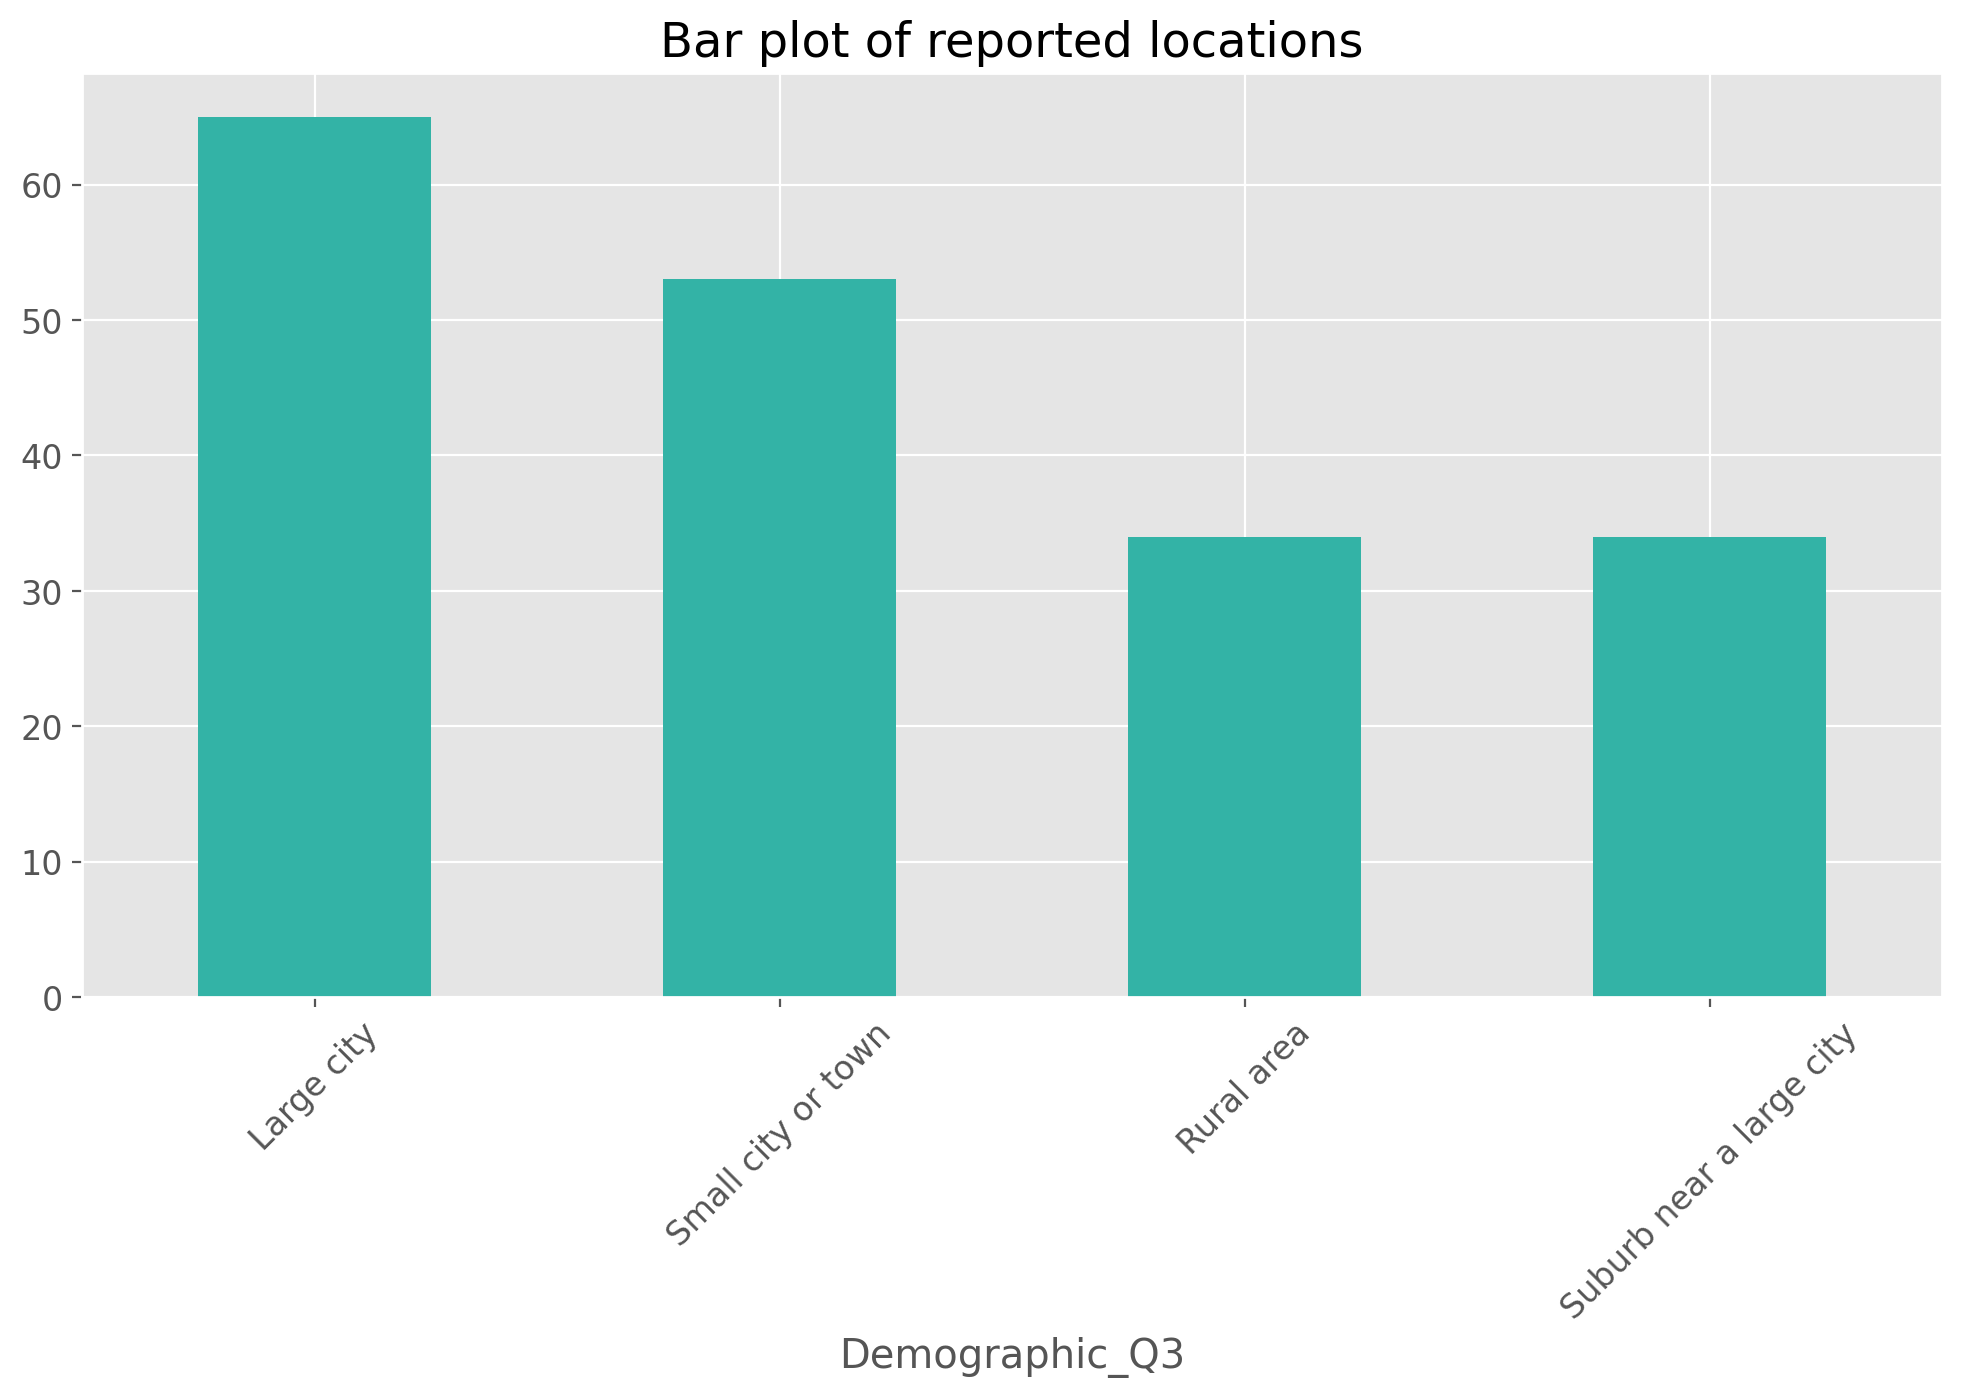

In [21]:
print(ncs['Demographic_Q3'].value_counts())

ncs['Demographic_Q3'].value_counts().plot(kind = 'bar', color = '#33b3a6', title = 'Bar plot of reported locations')
plt.xticks(rotation=45)
plt.show();

#### 3.4.2 Secondly, the reported gender column. 

This shows that the respondents to this questionnaire were mostly reported as a 'woman'. 
This could possibly introduce some bias into the findings of the data. 

Demographic_Q2
Woman                139
Man                   42
Non-binary             4
Prefer not to say      1
Name: count, dtype: int64


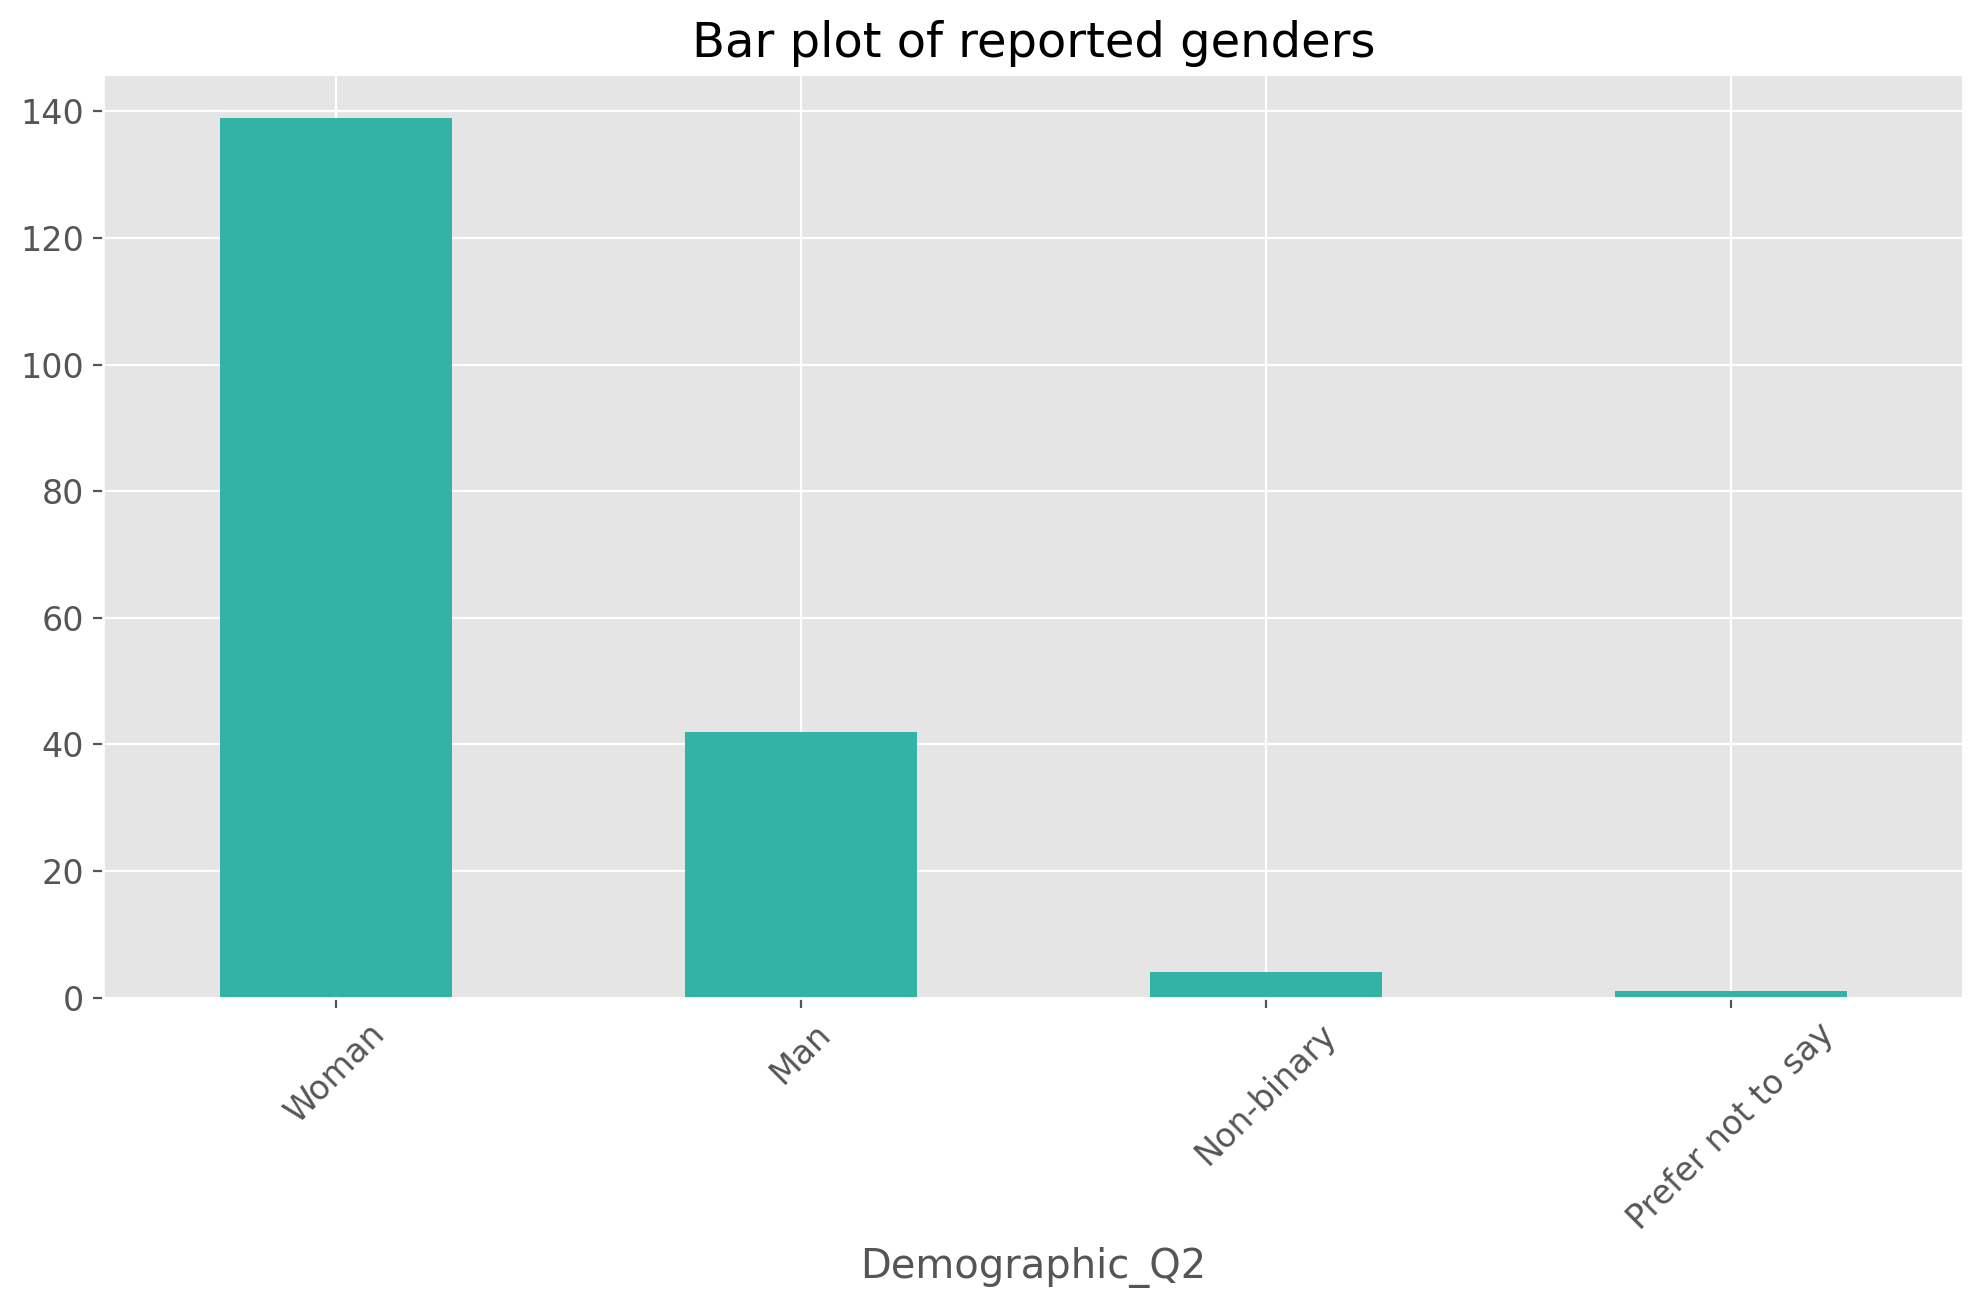

In [22]:
print(ncs['Demographic_Q2'].value_counts())

ncs['Demographic_Q2'].value_counts().plot(kind = 'bar', color = '#33b3a6', title = 'Bar plot of reported genders')
plt.xticks(rotation=45)
plt.show();

#### 3.4.3 Next, I will analyse is the job-related data. 

This shows that the highest group of respondents is 'student', again possibly unsurprising as it was carried out for a Master's Dissertation at the University of Glasgow. 

Demographic_Q4
Student           97
Employed          47
Self-employed     15
Retired            8
Business owner     4
Other              4
Unemployed         4
Off-gridder        3
Carer              3
Traveller          1
Name: count, dtype: int64


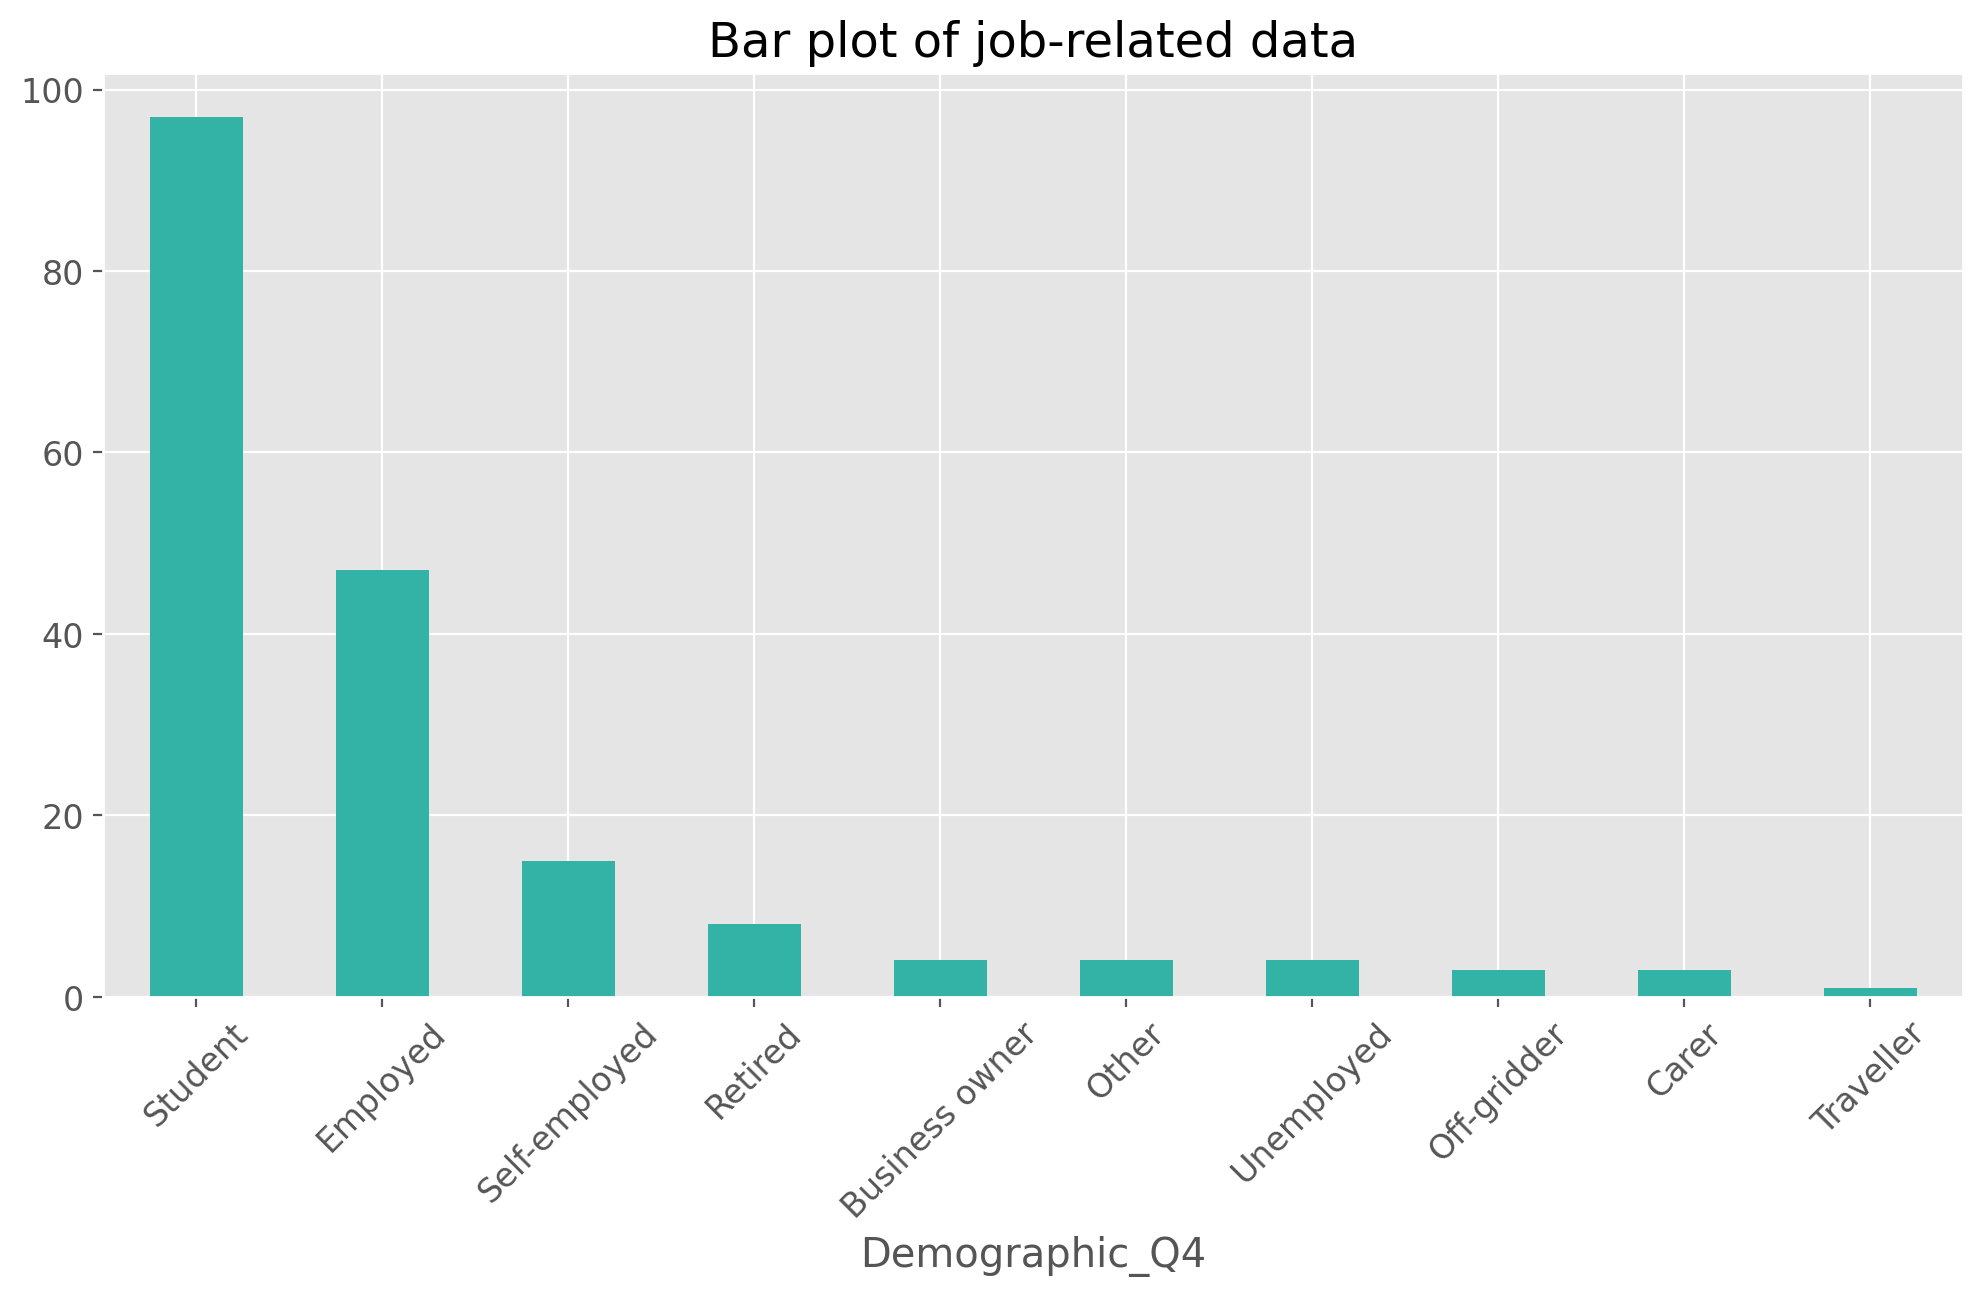

In [23]:
print(ncs['Demographic_Q4'].value_counts())

ncs['Demographic_Q4'].value_counts().plot(kind = 'bar', color = '#33b3a6', title = 'Bar plot of job-related data')
plt.xticks(rotation=45)
plt.show();

#### 3.4.4 Finally, the 'Time spent in nature' column. 
This shows that the respondents to this questionnaire were very heavily toward the side of spending a lot of time in nature. 

This could make sense, as according to the key details of the dataset, they focused on *'groups emphasising well-being and/or outdoor lifestyles (i.e., off-grid living, campervans, and “VanLife” groups)'.*

Demographic_Q6
Over 6 hours           108
4 hours                 22
5 hours                 19
3 hours                 15
2 hours                 11
Up to 2 hours            6
30 minutes - 1 hour      5
Name: count, dtype: int64


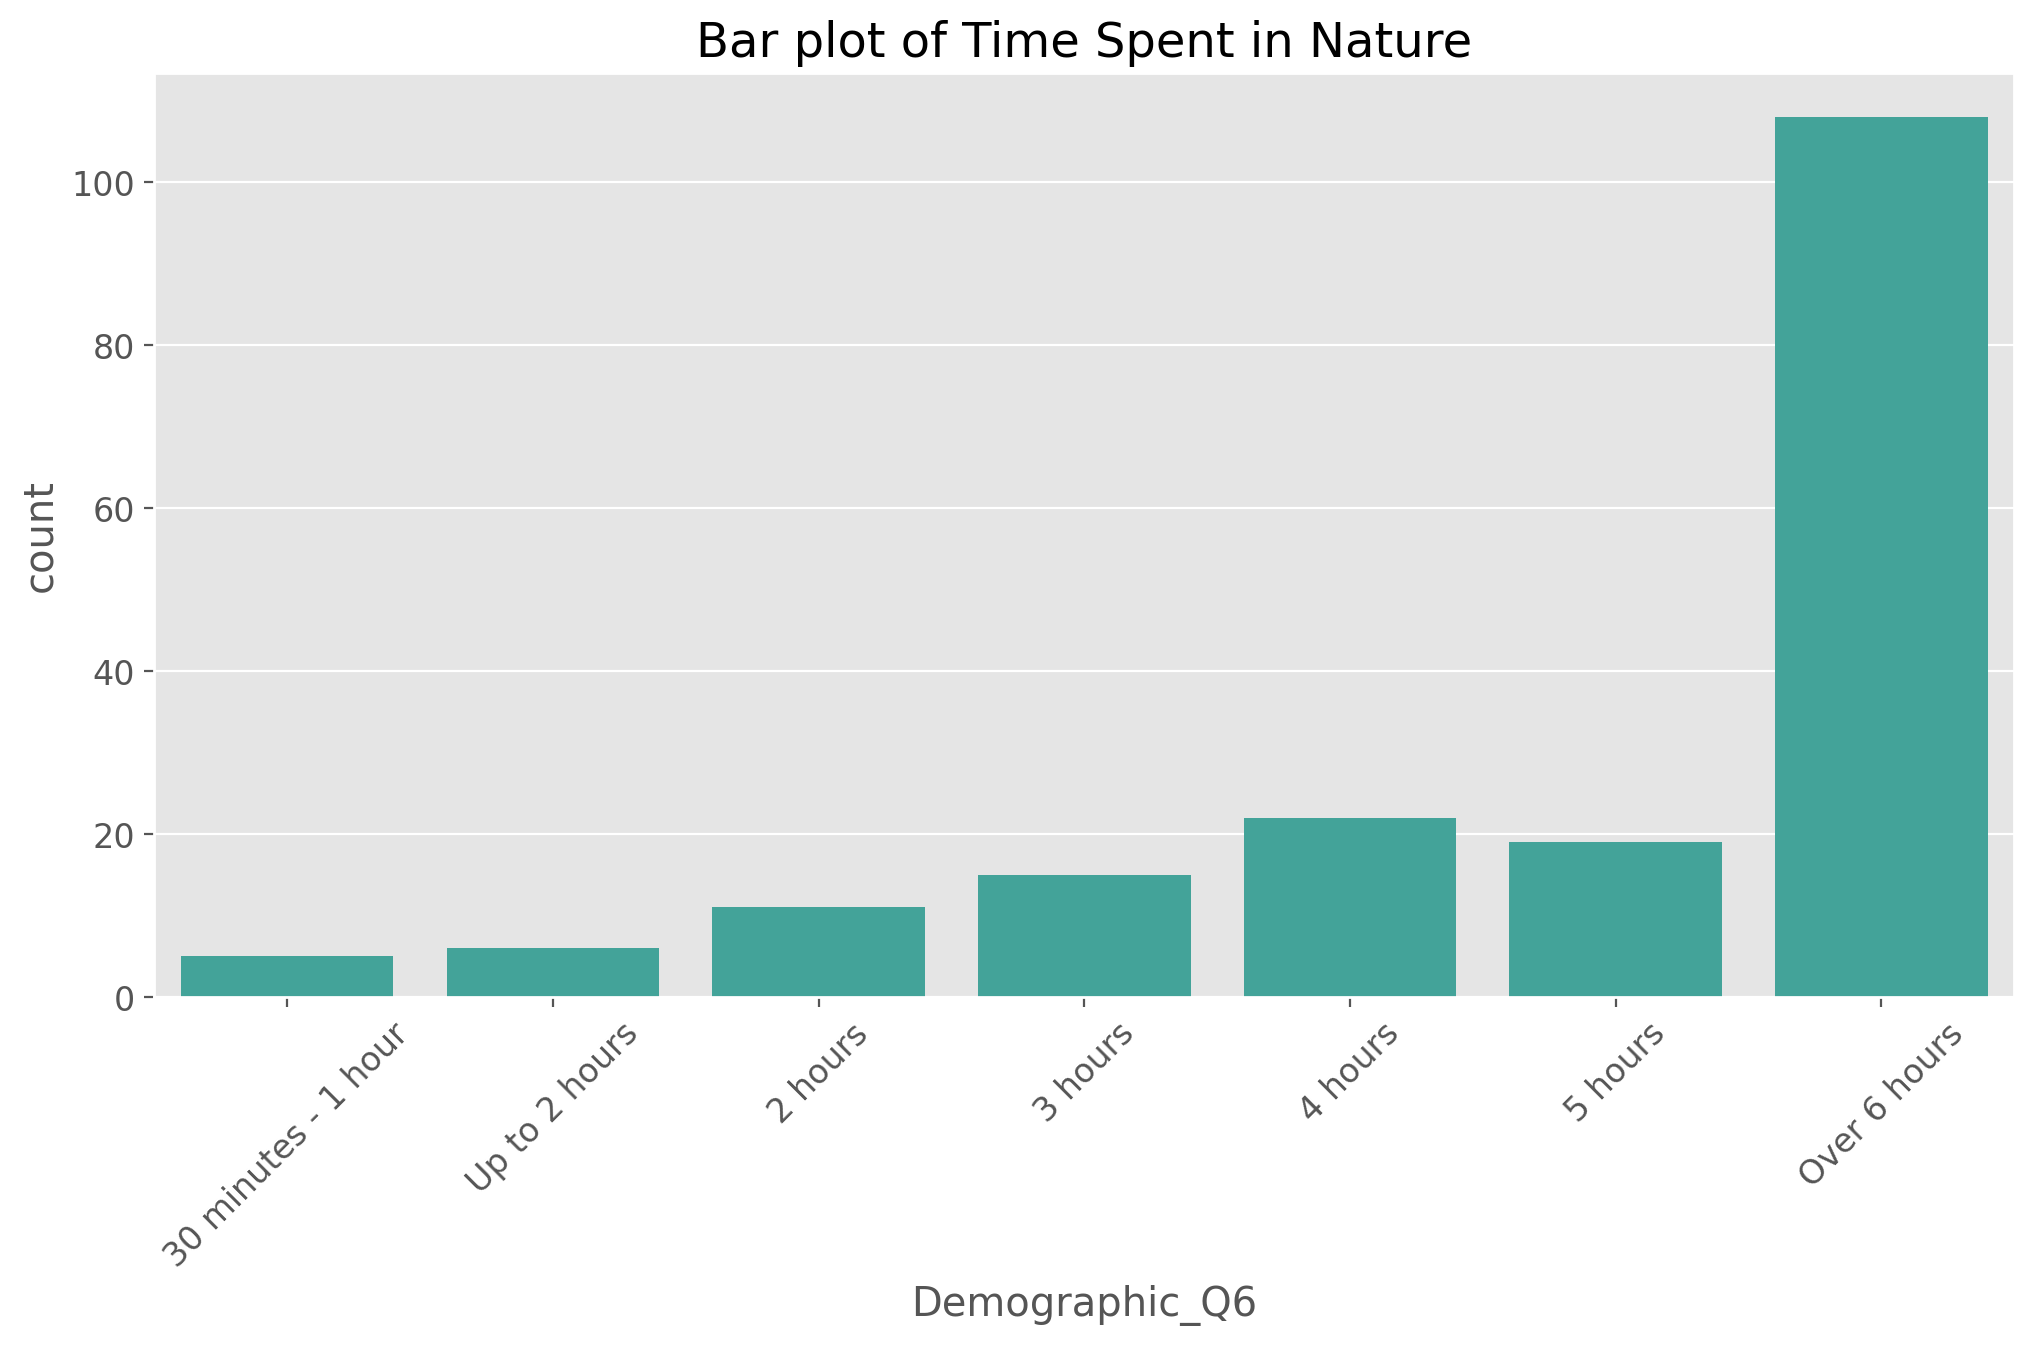

In [24]:
print(ncs['Demographic_Q6'].value_counts())

order = [
    '30 minutes - 1 hour',
    'Up to 2 hours',
    '2 hours',
    '3 hours',
    '4 hours',
    '5 hours',
    'Over 6 hours'
]

sns.countplot(
    data=ncs,
    x='Demographic_Q6',
    order=order,
    color='#33b3a6'
)

plt.title('Bar plot of Time Spent in Nature')
plt.xticks(rotation=45)
plt.show()

#### 3.4.5 - Are female students the largest group of respondents? 

It seemed like with some of the categories, there were a few types of majority groups.  

It is 78/ 186 respondents - which is almost half of respondents, which when you compare with the number of male students, or female employees, it is a much larger number. 

In [25]:
female_student = ncs[(ncs['Demographic_Q2'] == 'Woman') & (ncs['Demographic_Q4'] == 'Student')]
print('Number of female students: ',female_student.shape)

male_student = ncs[(ncs['Demographic_Q2'] == 'Man') & (ncs['Demographic_Q4'] == 'Student')]
print('Number of male students:   ' ,male_student.shape)

female_employed = ncs[(ncs['Demographic_Q2'] == 'Woman') & (ncs['Demographic_Q4'] == 'Employed')]
print('Number of female employees:' ,female_employed.shape)

Number of female students:  (78, 9)
Number of male students:    (17, 9)
Number of female employees: (34, 9)


## 4. Comparing the NR Scores against other data. 

### 4.1 Firstly, by location

It could be interesting to see whether there is a link between how related to nature people self-report, and where they live. 

Looking at the box plots below - which are the NR Scores grouped by location, we can see that overall it doesn't seem to vary *too much*, however there is a slightly higher mean NR Score for rural areas. Although it also has the lowest outlier score. 

The mean of the large city and suburb near a large city is *very* similar, however the suburb has a larger spread across values. 

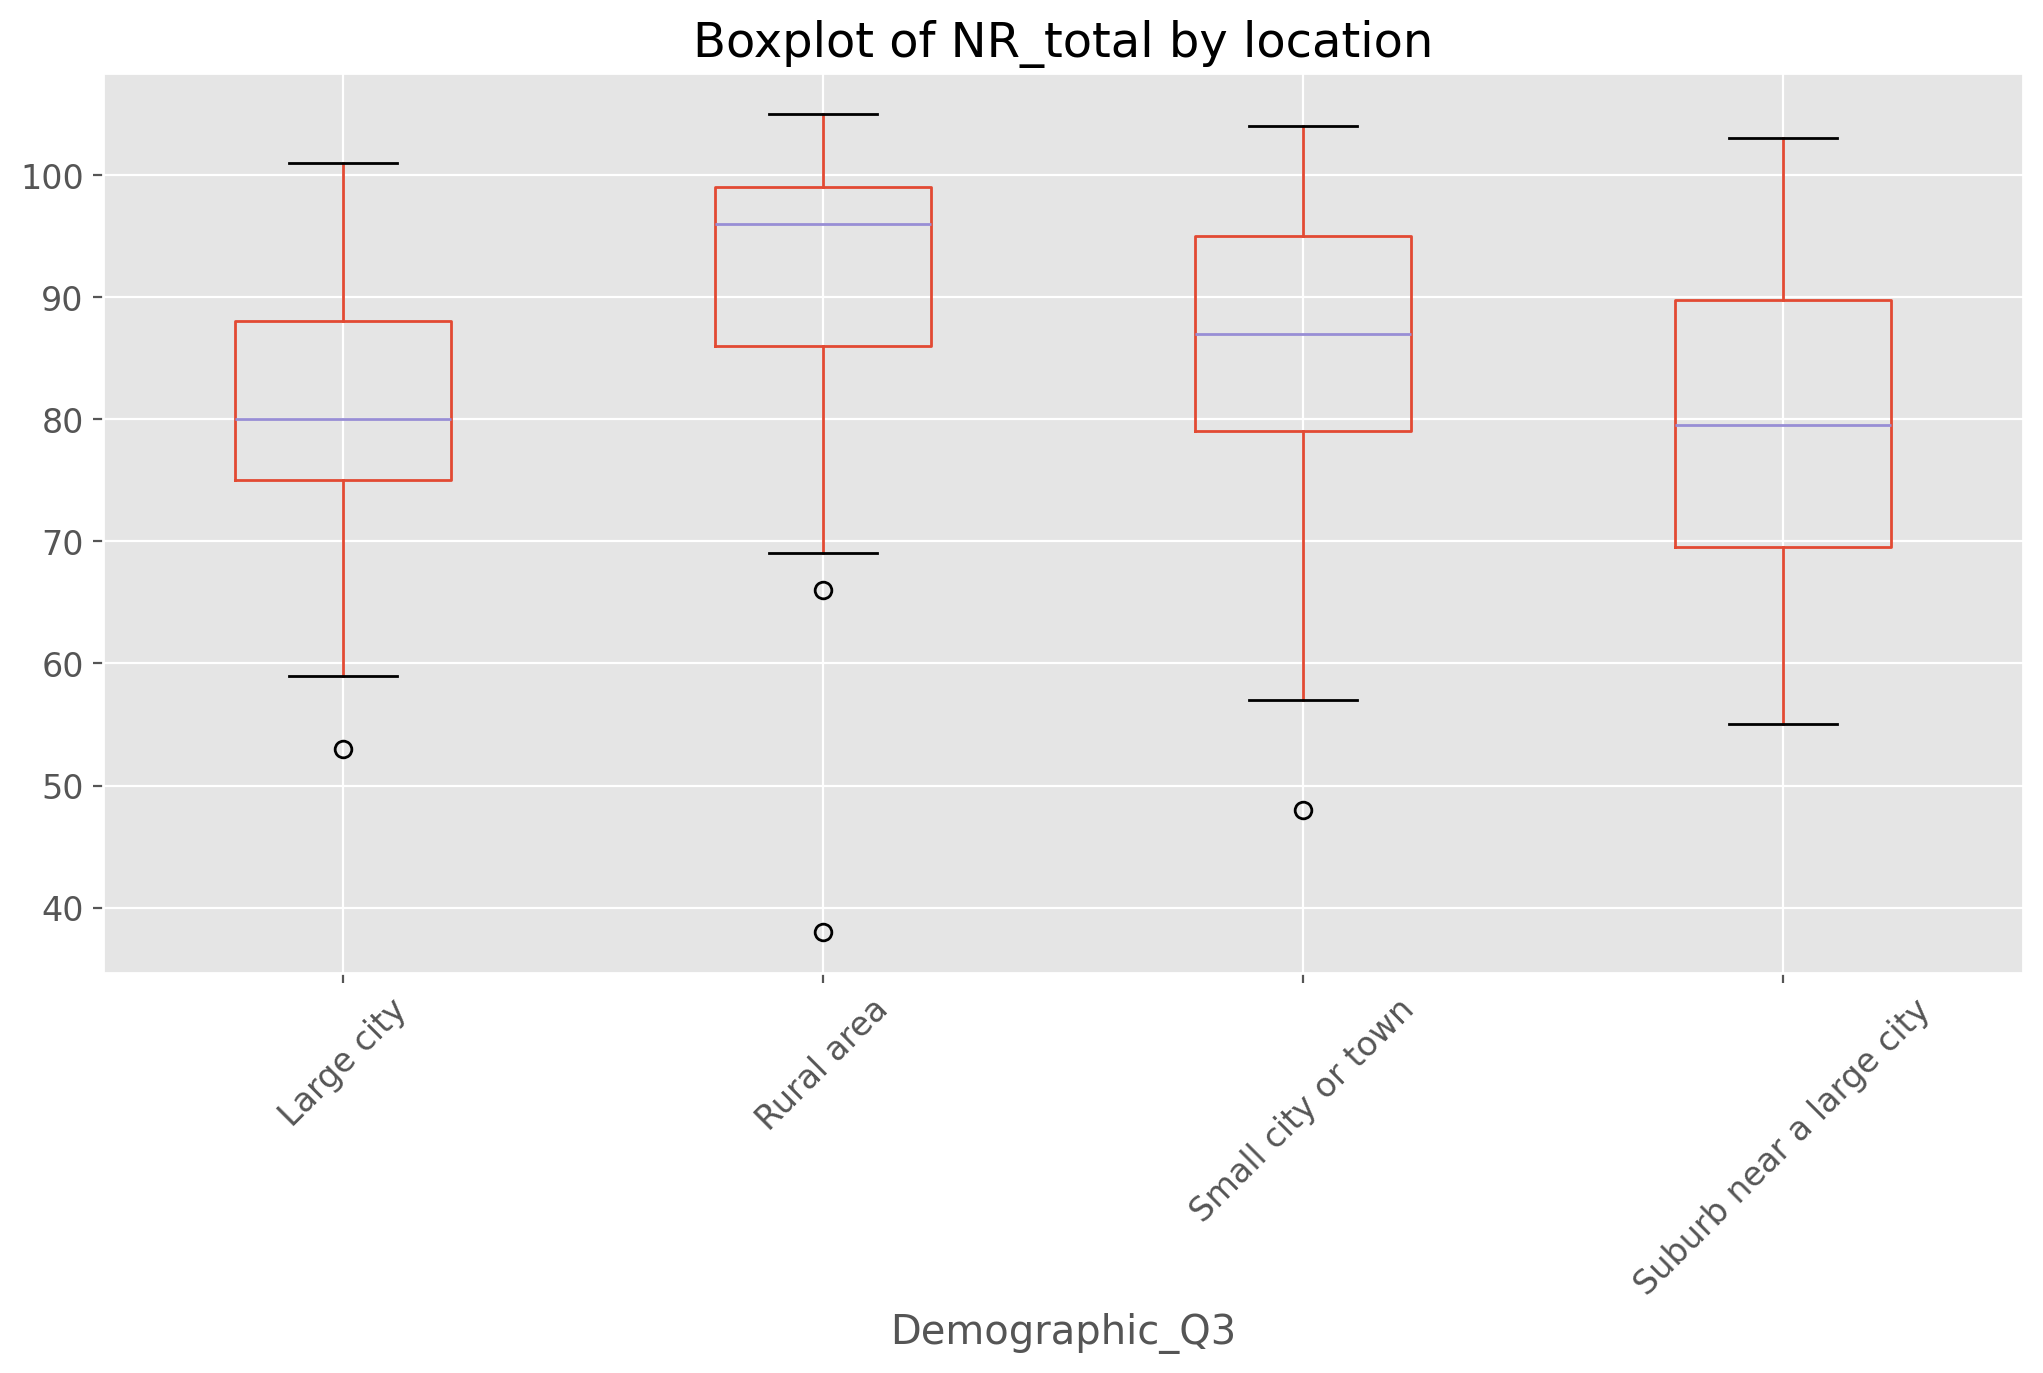

In [26]:
ncs.boxplot(column = 'NR_total', by = 'Demographic_Q3')
plt.title('Boxplot of NR_total by location')
plt.suptitle('')
plt.rcParams['font.size'] = 8
plt.xticks(rotation=45)
plt.show();


### 4.2 Secondly, by gender

I don't feel incredibly confident in making judgements from the difference in NR Scores depending on gender, as I don't think it was a fair split. 
But it does seem that there is a very similar mean across male, female and non-binary. 
However, there is a larger range for females, which could make sense just as there are more entries. 

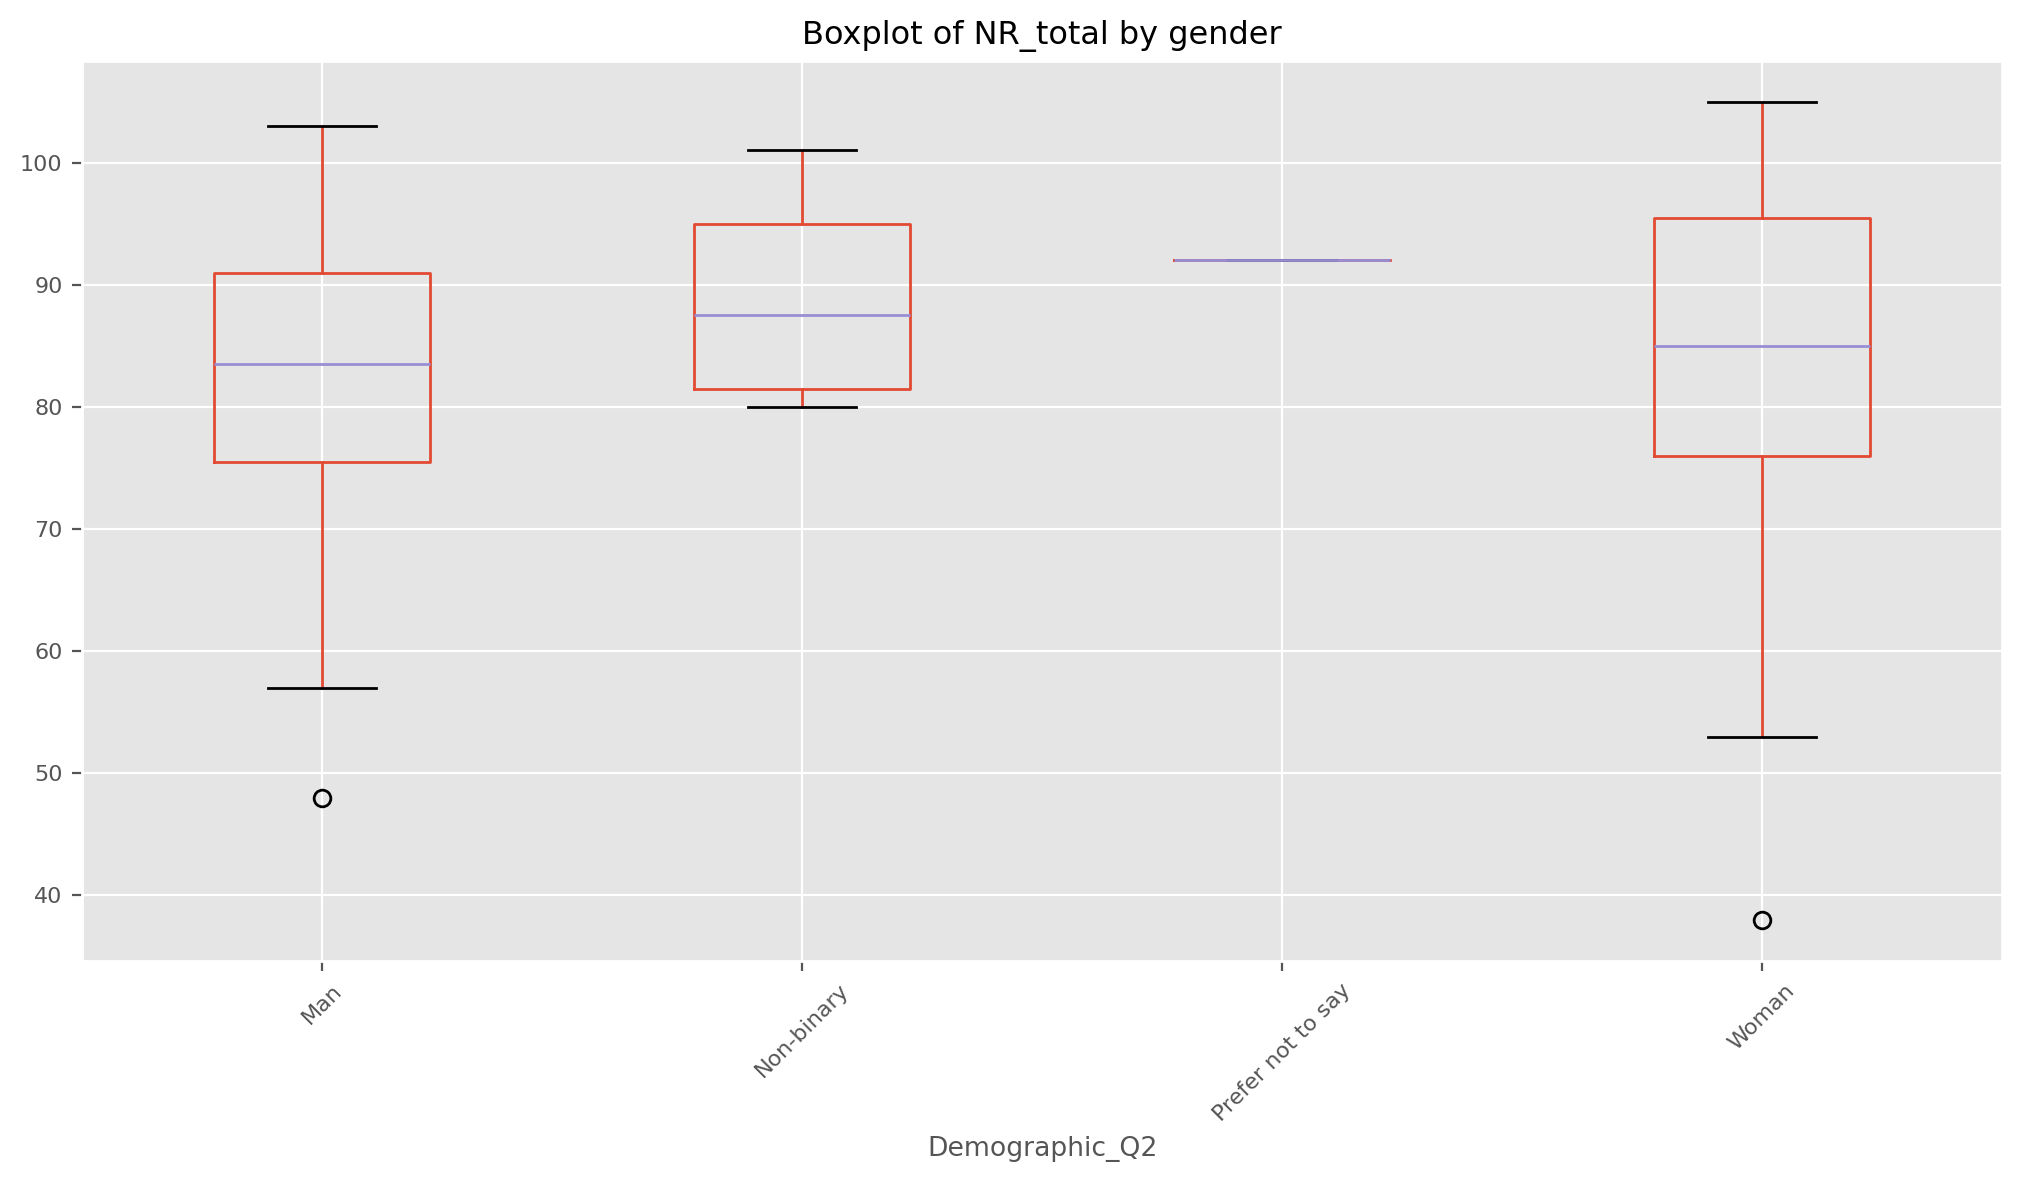

In [27]:
ncs.boxplot(column = 'NR_total', by = 'Demographic_Q2')
plt.title('Boxplot of NR_total by gender')
plt.suptitle('')
plt.xticks(rotation=45)
plt.show();

### 4.3 Thirdly, by job

It could be interesting to see whether there is a link between how related to nature people self-report, and the job that they do. 
Again, as we discussed earlier, the largest group is student and so I don't feel incredibly confident in making sweeping statements based on this data. 
However, if we were to do that, we could say that there is a wide spread of means across the different jobs. And students have a larger range (which makes sense since there were more entries). 

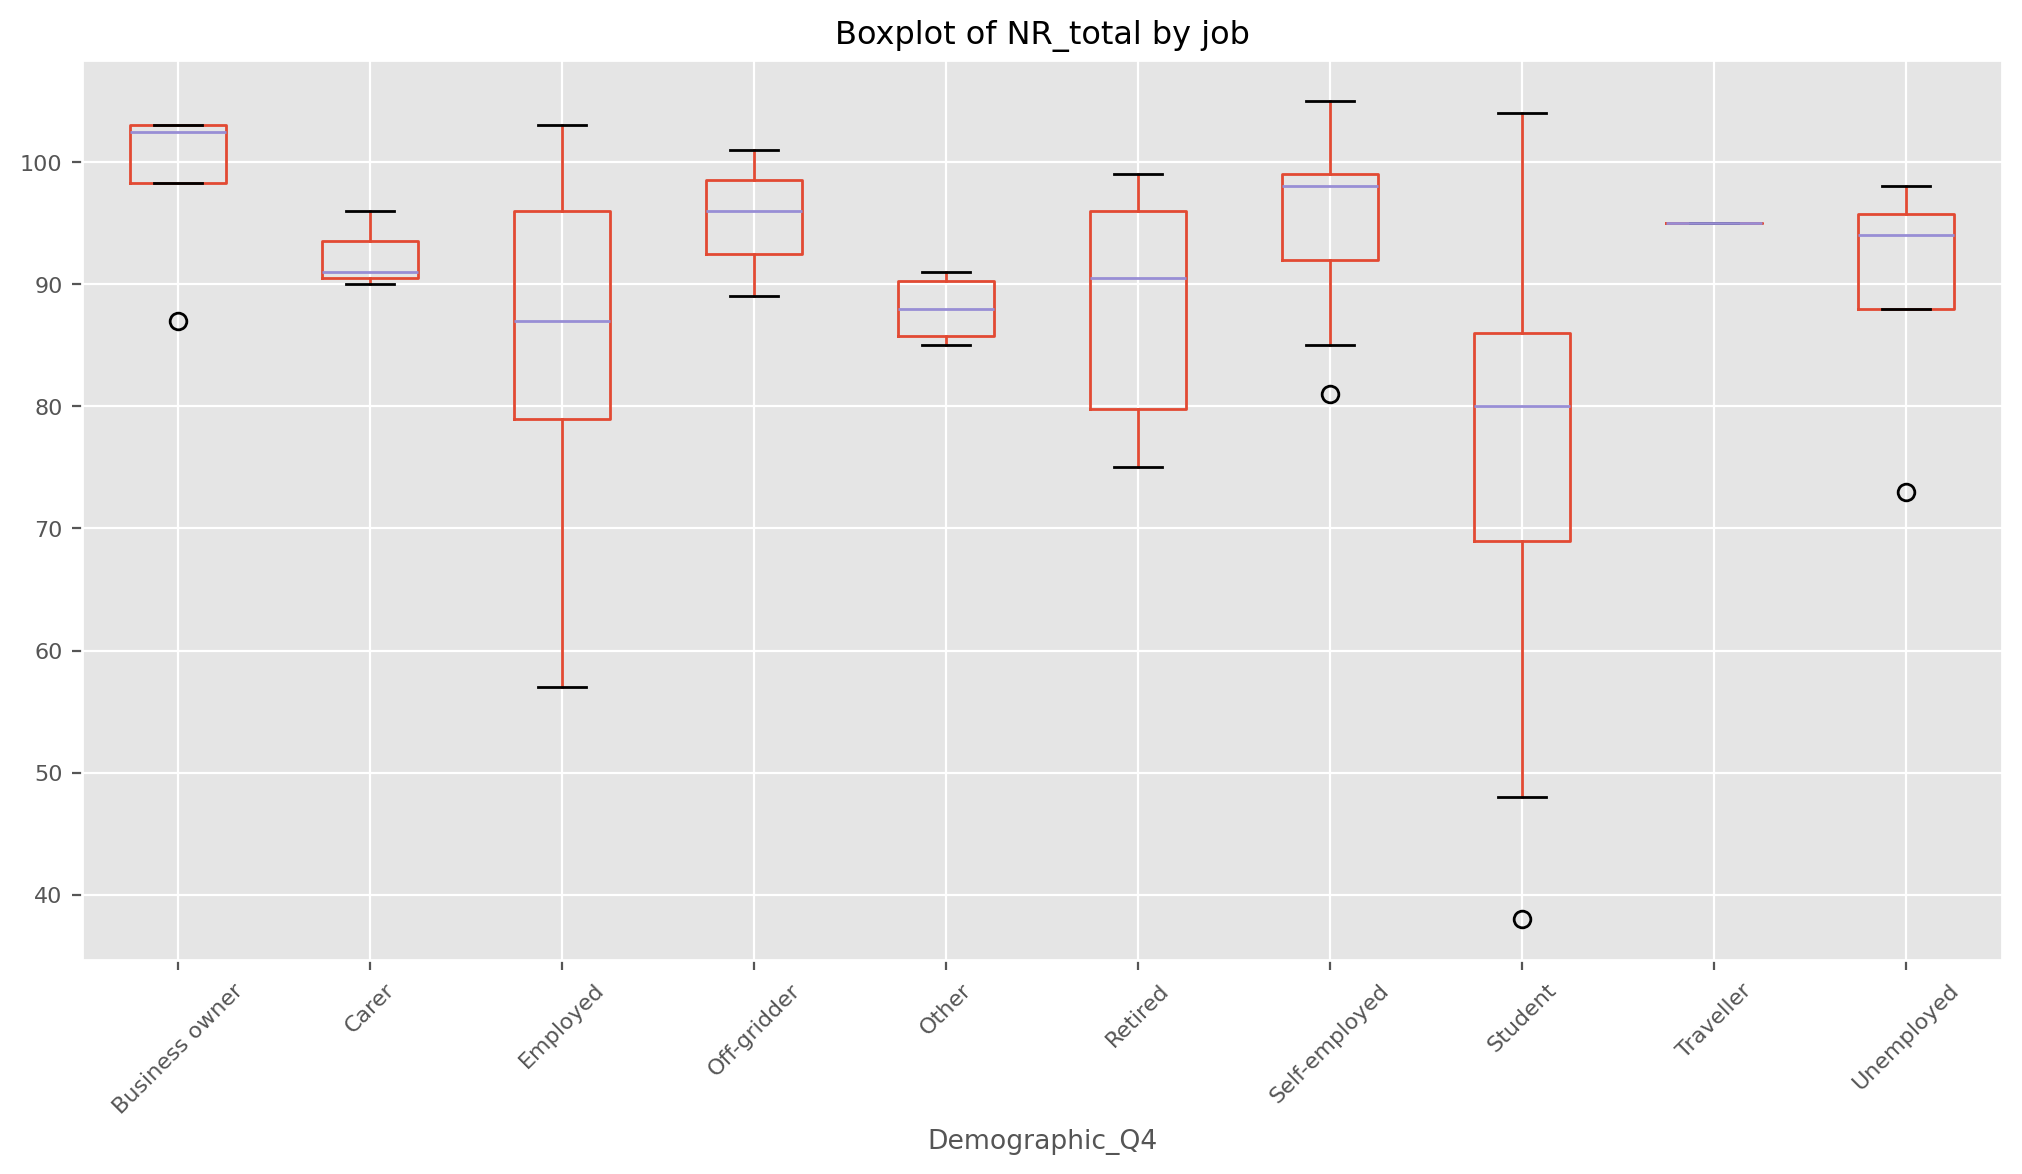

In [28]:
ncs.boxplot(column = 'NR_total', by = 'Demographic_Q4')
plt.title('Boxplot of NR_total by job')
plt.suptitle('')
plt.xticks(rotation=45)
plt.show();

### 4.4 Fourth, by time spent outside. 

This one I needed to manually order by the actual time in order to make the graph more useful at a glance. 
It seems to show that there is a possibly intuitive connection between the mean nature relatedness score and the time spent outside. 



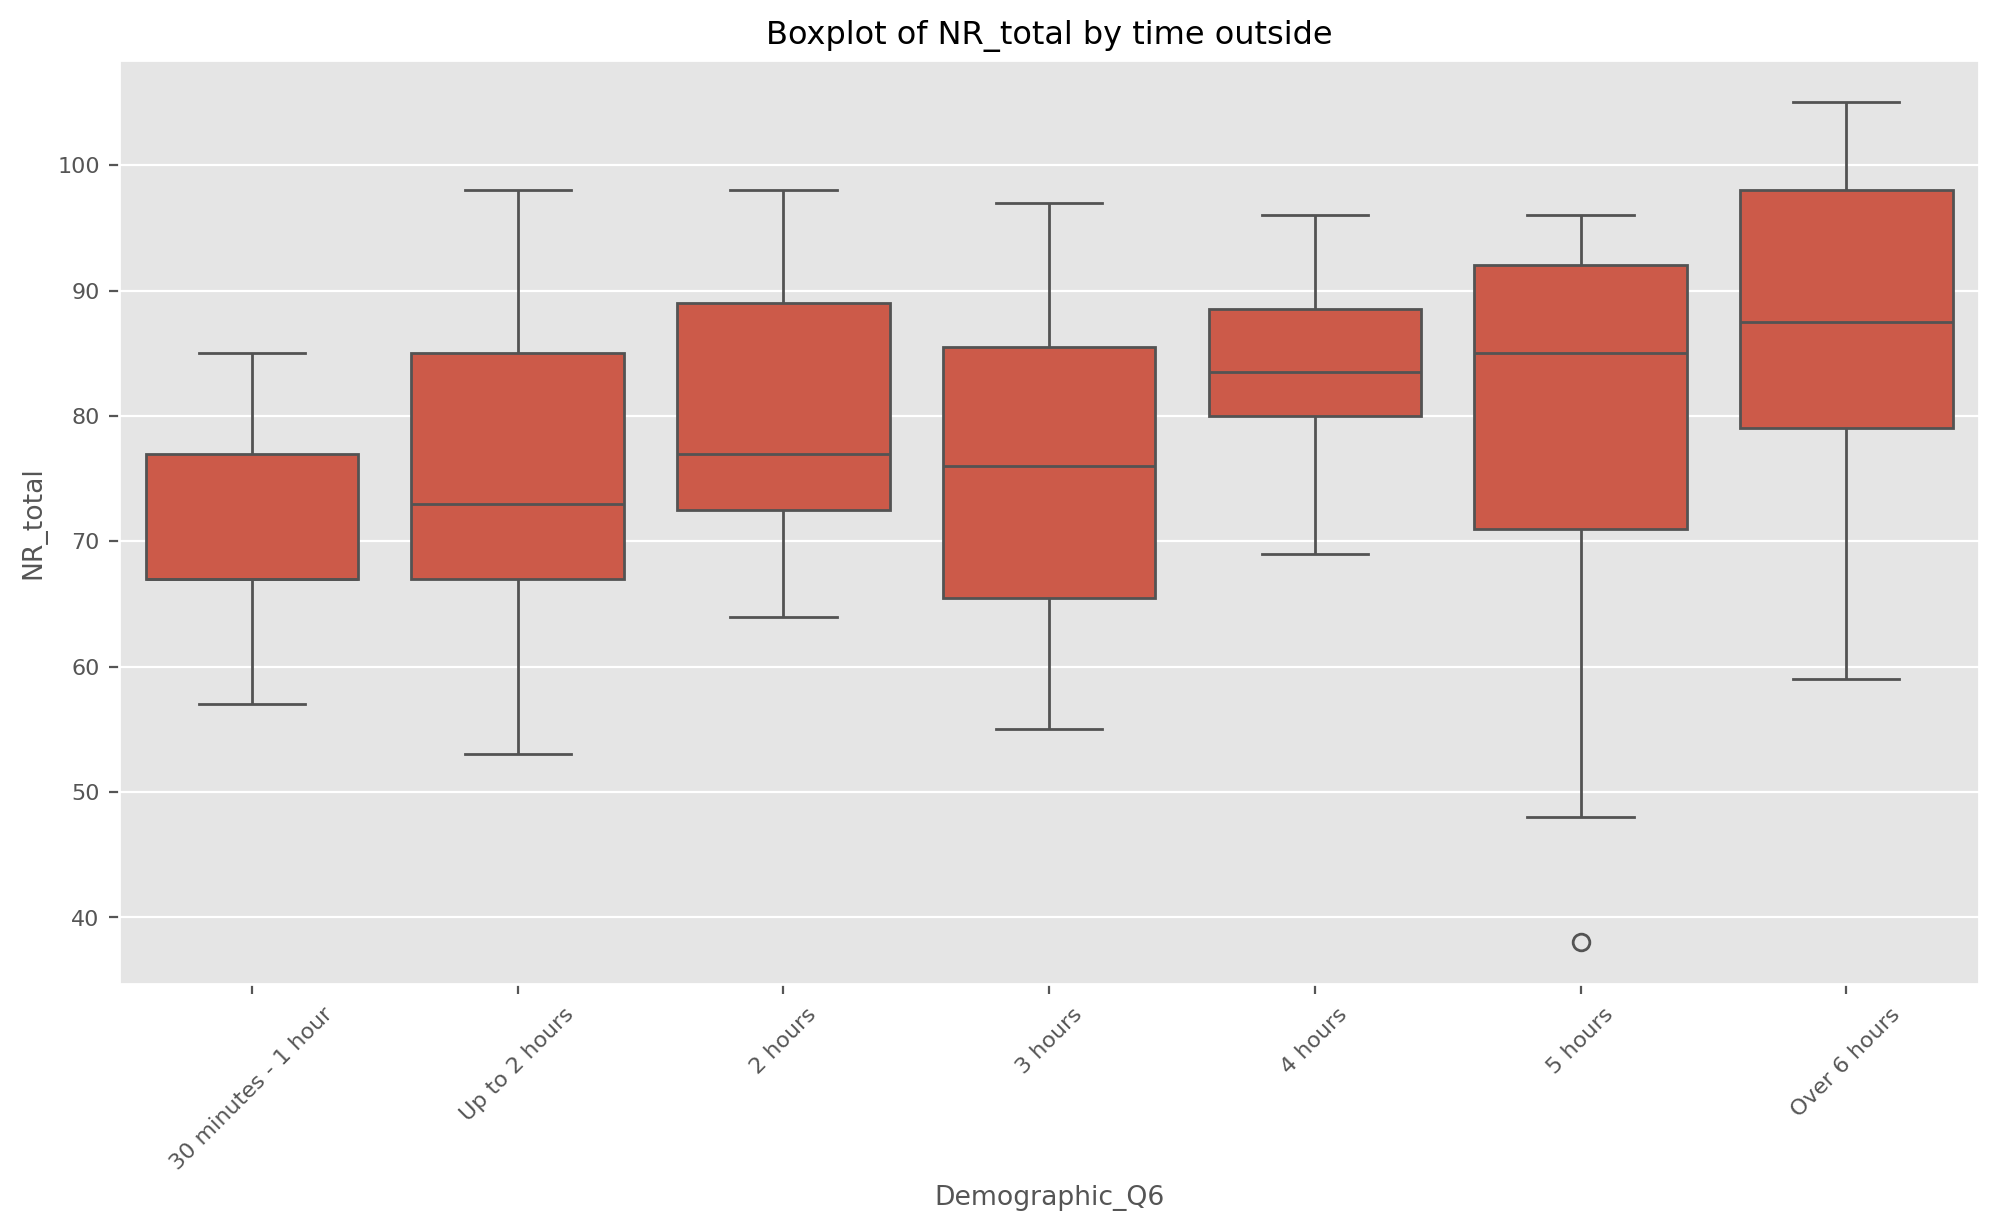

In [29]:
order = [
    '30 minutes - 1 hour',
    'Up to 2 hours',
    '2 hours',
    '3 hours',
    '4 hours',
    '5 hours',
    'Over 6 hours'
]

sns.boxplot(
    data=ncs,
    x='Demographic_Q6',
    y='NR_total',
    order=order
)

plt.title('Boxplot of NR_total by time outside')
plt.xticks(rotation=45)
plt.show();

### 4.5 Finally, it could be interesting to compare NR scores and the stated WHO5_total score 

There doesn't seem to be a huge correlation to be honest!

<Axes: xlabel='WHO5_total', ylabel='NR_total'>

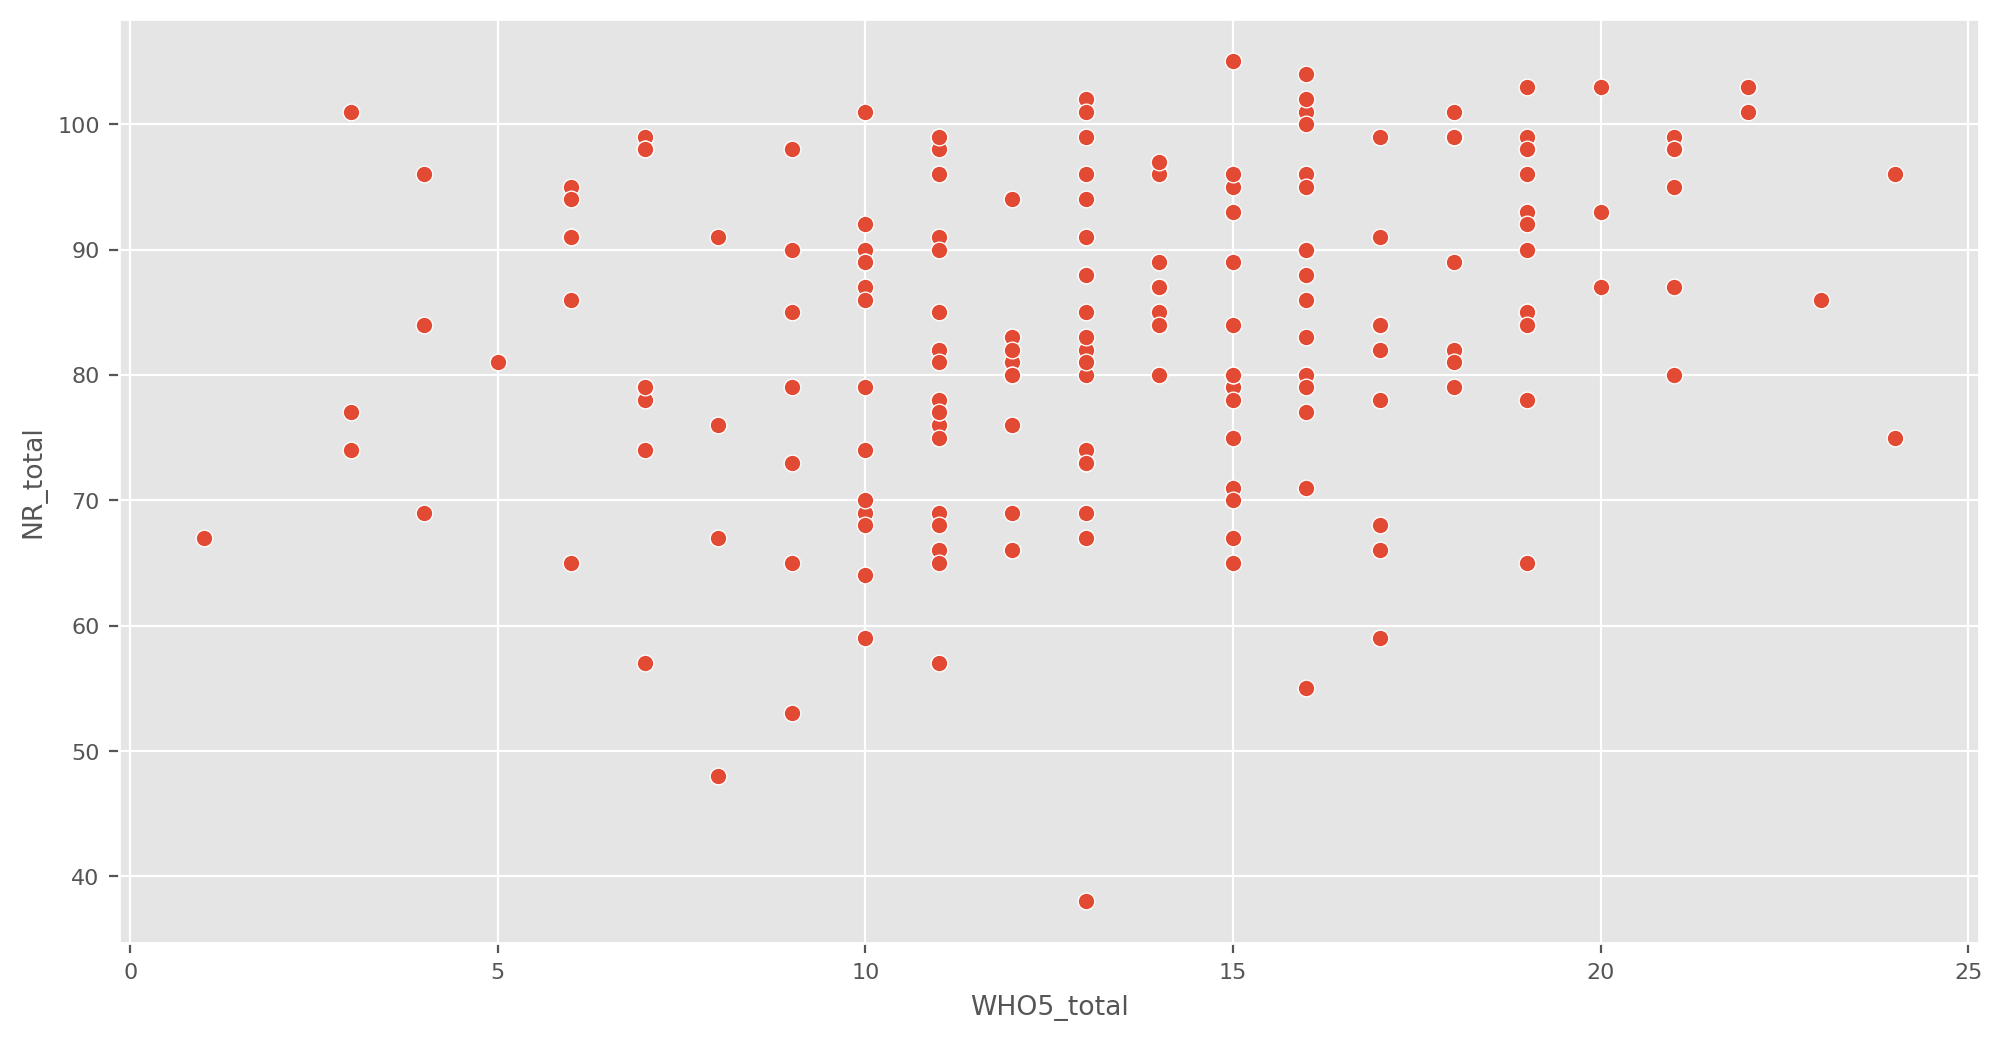

In [30]:
sns.scatterplot(data = ncs, y=ncs['NR_total'], x=ncs['WHO5_total'])

## 5. Summary
* There were four demographic data (gender, location, job, and time spent in nature) and the WHO5 wellbeing score. In this notebook, I tried to look at what relationship they may have to the nature relatedness score.
* Here is short summary of the relation for each one: 

#### 5.1 Location 
* There were four different types of location - it didn't seem to have too much of an impact, but the rural areas had a slightly higher mean and the suburb and large city areas were lower but very similar to each other. 

#### 5.2 Gender 
* This dataset is made up of mostly women, mostly students, and also people that spend a 'large' amount of time in nature.
* It seemed like gender didnt have a huge impact on the NR Scores, although there wasn't really an even distribution across different genders to make that a definite statement.

#### 5.3 Job 
* This dataset is made up of mostly students, and the second largest group was about a quarter of the size (employed category).
* I didn't feel too comfortable commenting on the impact of the jobs since there was not a great distribution of respondents across the different catgories. 

#### 5.4 Time spent in nature
* This dataset is made up of mostly people who spend *more* time in nature, which makes sense because they focused on *'groups emphasising well-being and/or outdoor lifestyles (i.e., off-grid living, campervans, and “VanLife” groups)'.*

#### 5.5 WHO5 Score 
* This self-reported wellbeing score didn't seem to have any clear relationship to the Nature Relatedness score.


**Thank you for reading! 👋**